<h1 style="text-align: center; font-family: 'Playfair Display', serif;">
  Unlocking Data Engineering Opportunities : A Salary Prediction Study <br> with Glassdoor Job Listings!
</h1>

<p style="text-align: center;">
  <img src="https://media1.thehungryjpeg.com/thumbs2/ori_4157969_p0ujorqee30cxltb8w2dbinoklkfrykqkyczbars_cartoon-businessmen-office-workers-with-laptop-in-different-situation.jpg" alt="Businessmen Cartoon">
</p>

Anisha Katiyar   [EDIT]

This project is done independently for the University of Maryland, with all code and prose written by me. All knowledge for completing this study was obtained through the University and internet sources.

"The study in this project concerns ...... The purpose of this study is ...."



# Table of Contents

1. [Introduction](#introduction)
2. [Part 1: Data Collection](#part-1-data-collection)
3. [Part 2: Data Cleaning](#part-2-data-cleaning)
4. [Part 3: Exploratory Data Analysis](#part-3-exploratory-data-analysis)
5. [Part 4: Full Model Implementation](#part-4-full-model-implementation)
6. [Part 5: Machine Learning](#part-5-machine-learning)
7. [Part 6: Visualizations](#part-6-visualizations)
8. [Part 7: Conclusions](#part-7-conclusions)
9. [Bibliography](#bibliography)

---

## Introduction

This document outlines the steps taken to collect, clean, analyze, and model election data. It provides insights into the methods used for data preprocessing, exploratory data analysis, machine learning model implementation, and visualizations.

---



Data Science Salary Estimator: Project Overview
Created a tool that estimates data science salaries (MAE ~ $ 11K) to help data scientists negotiate their income when they get a job.
Scraped over 1000 job descriptions from glassdoor using python and selenium
Engineered features from the text of each job description to quantify the value companies put on python, excel, aws, and spark.
Optimized Linear, Lasso, and Random Forest Regressors using GridsearchCV to reach the best model.
Built a client facing API using flask












## Part 1: Data Collection

### Data Collection

For my **"Data Engineering Jobs Exploration and Salary Prediction Project based on Glassdoor Job Listings"**, I initially attempted to scrape data directly from Glassdoor. However, I encountered several challenges that made this approach difficult. Glassdoor employs various measures to hinder web scraping, such as JavaScript rendering, dynamic data loading, and anti-scraping techniques like CAPTCHAs and rate limiting. These complexities required tools like Selenium, Playwright, or Puppeteer to handle dynamic content. Additionally, Glassdoor’s use of third-party APIs and potential IP blocking posed further obstacles.

Considering these difficulties and the need for reliable data, I decided to use a pre-scraped CSV file available on Kaggle. This allowed me to proceed with my project without violating any terms of use or spending excessive time overcoming technical barriers.

---

The project began with scraping weekly job postings of data engineering roles from Glassdoor in the US. The collected data included key details such as job titles, company names, job locations, job descriptions, salary estimates, education requirements, and required skills. The data was saved in a CSV file named using the format "glassdoor-data-engineer-15-2023.csv," where "15" indicated the week number the data was scraped, and "2023" referred to the year. This CSV file was stored locally in the "data/raw/" folder for further processing.

Selenium was used to scrape job postings specifically from the previous week. The resulting output file, stored as "glassdoor-data-engineer-15-2023.csv," contained the following columns: Company Name, Job Title, Salary Estimate, Job Description, Rating, Job Location, Company Size, Company Founded Date, Type of Ownership, Industry, and Sector.

One of the primary challenges during scraping was dealing with duplicated job postings. After scraping multiple pages, Glassdoor’s website would rerender earlier job listings, resulting in repeated data. To overcome this issue, a scheduler was implemented to run the script weekly, ensuring that the latest job listings were collected without redundancy.

Due to the complexities of scraping and to ensure reliable data, the pre-scraped dataset was downloaded from Kaggle. This dataset provided a comprehensive collection of job postings without the challenges faced during the direct scraping attempt. The dataset was then used for further analysis and modeling in the project.


### Importing all Essential Libraries

In [1]:
import os
import re
import numpy as np
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import datetime
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

color = sns.color_palette()
sns.set_style('darkgrid')

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder

# !pip install nltk
# !pip install stopwords
# !pip install wordcloud

# import nltk

# nltk.download('stopwords')
# nltk.download('punkt')

# import nltk
# nltk.data.clear_cache()
# nltk.download('punkt', force=True)

# import nltk
# nltk.download('punkt', force=True)

# import nltk
# print(nltk.data.find('tokenizers/punkt'))

# import nltk
# print(nltk.__file__)


# import nltk
# nltk.download('punkt')  # Download the correct 'punkt' resource

# import nltk
# nltk.data.clear_cache()
# nltk.download('punkt', force=True)

# import nltk
# print(nltk.data.path)








In [2]:
import warnings
warnings.filterwarnings('ignore')



## Part 2: Data Cleaning

### Formatting the DataFrames
This section covers how the collected data was formatted into clean, usable dataframes.

### Merging all DataFrames
Once the data was cleaned, it was merged into a single dataframe for analysis.

### Fixing Missing Data
Techniques for dealing with missing data are discussed in this section.

---

## I. 🧹 Data Cleaning

### Loading the data from the scraped csv files

The datasets names is composed of the week number of the year and the year they were scraped in. For example "glassdoor-data-engineer-19-2023" was scraped on the 19th week of 2023.

In [3]:
# Gathering Scraped Files


'''

---describe structure of them, etc

Formatting the DataFrames
This section covers how the collected data was formatted into clean, usable dataframes.

'''





def load_datasets(dir_path):
    
    dfs = []
    # looping over each file in the directory
    for i, filename in enumerate(os.listdir(dir_path)):
        if filename.endswith('.csv'):  # checking if file has .csv extension
            file_path = os.path.join(dir_path, filename) 
            
            # reading the CSV file into a DataFrame and giving it a name
            df_name = f'df{i+1}'  # generating a name like 'df1', 'df2', etc.
            df = pd.read_csv(file_path)
            
            # adding the DataFrame to the list
            dfs.append((df_name, df))

    # concatenating all the DataFrames together
    df_list = [df for _, df in dfs]  # extracting just the DataFrames
    df = pd.concat(df_list, axis=0)

    return df

In [4]:
dir_path = "../data/raw/"
df = load_datasets(dir_path)

In [5]:
df

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue
0,SourceMantra\n3.7,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",$67.50 /hr (est.),Unknown,Company - Public,Financial Services,Accounting & Tax,NaN,Unknown / Non-Applicable
1,Cloud Shift Technologies LLC\n5.0,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",$52.00 /hr (est.),1 to 50 Employees,Company - Private,NaN,NaN,NaN,Unknown / Non-Applicable
2,Fortek IT Solutions USA,NaN,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,$70.00 /hr (est.),NaN,NaN,NaN,NaN,NaN,NaN
3,Wiliot\n4.5,4.5,Remote,Data Engineer,Wiliot was founded by the team that invented o...,NaN,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,2017.0,Unknown / Non-Applicable
4,WCG\n3.2,3.2,"Princeton, NJ",Data & Analytics Engineer (Remote),Description and Requirements\nJOB SUMMARY:\n\n...,"$63,680 /yr (est.)",1001 to 5000 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,NaN,$100 to $500 million (USD)
...,...,...,...,...,...,...,...,...,...,...,...,...
445,Moen\n4.0,4.0,"North Olmsted, OH",Data Operations Engineer,Company Description\n\nFortune Brands Innovati...,NaN,201 to 500 Employees,Subsidiary or Business Segment,Retail & Wholesale,Wholesale,NaN,$25 to $100 million (USD)
446,Discover Financial Services\n3.9,3.9,Illinois,Data Engineer - Abinitio,"Discover. A brighter future.\nWith us, you’ll ...","$113,500 /yr (est.)",10000+ Employees,Company - Public,Financial Services,Banking & Lending,1985.0,$1 to $5 billion (USD)
447,Three Ships Media\n3.4,3.4,"Charlotte, NC",Data Analytics Engineer,Role Overview:\n3S Health is seeking a hands-o...,"$92,505 /yr (est.)",51 to 200 Employees,Company - Private,Media & Communication,Advertising & Public Relations,2009.0,Unknown / Non-Applicable
448,USAA\n3.4,3.4,"San Antonio, TX",Data Engineer II,"Why USAA?\nAt USAA, we have an important missi...",NaN,10000+ Employees,Company - Private,Insurance,Insurance Carriers,1922.0,$25 to $100 million (USD)


In [6]:
df.shape

(4260, 12)

In [7]:
df.columns

Index(['company', 'company_rating', 'location', 'job_title', 'job_description',
       'salary_estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'company_founded', 'company_revenue'],
      dtype='object')

### Cleaning the Data

### Let's drop the duplicated job listings from our dataset

In [8]:
df = df.drop_duplicates(subset=['job_description'])
df.shape

(1553, 12)

------Optional!! 📘 Let's export this uncleaned raw data and share it publicly on Kaggle

In [9]:
data_path = '../data/kaggle/'

df.to_csv(data_path + "glassdoor-data-engineer-kaggle.csv", index=False)

In [10]:
df

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue
0,SourceMantra\n3.7,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",$67.50 /hr (est.),Unknown,Company - Public,Financial Services,Accounting & Tax,NaN,Unknown / Non-Applicable
1,Cloud Shift Technologies LLC\n5.0,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",$52.00 /hr (est.),1 to 50 Employees,Company - Private,NaN,NaN,NaN,Unknown / Non-Applicable
2,Fortek IT Solutions USA,NaN,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,$70.00 /hr (est.),NaN,NaN,NaN,NaN,NaN,NaN
3,Wiliot\n4.5,4.5,Remote,Data Engineer,Wiliot was founded by the team that invented o...,NaN,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,2017.0,Unknown / Non-Applicable
4,WCG\n3.2,3.2,"Princeton, NJ",Data & Analytics Engineer (Remote),Description and Requirements\nJOB SUMMARY:\n\n...,"$63,680 /yr (est.)",1001 to 5000 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,NaN,$100 to $500 million (USD)
...,...,...,...,...,...,...,...,...,...,...,...,...
240,Concentrix\n4.0,4.0,Remote,Data Engineer Job Ref #: 795218,Job Title:\nData Engineer Job Ref #: 795218\nJ...,NaN,10000+ Employees,Company - Public,Information Technology,Information Technology Support Services,2004.0,$1 to $5 billion (USD)
265,ADT\n3.1,3.1,"Boca Raton, FL",Data Engineer,Company Overview:\n\nADT has been in the busin...,"$109,599 /yr (est.)",10000+ Employees,Company - Public,Management & Consulting,Security & Protective,1874.0,$5 to $10 billion (USD)
320,Capital One\n4.1,4.1,"Wilmington, DE",Senior Data Engineer,"802 Delaware Avenue (18052), United States of ...",NaN,10000+ Employees,Company - Public,Financial Services,Banking & Lending,1994.0,$10+ billion (USD)
356,Three Ships Media\n3.4,3.4,"Charlotte, NC",Data Analytics Engineer,Role Overview:\n3S Health is seeking a hands-o...,"$92,505 /yr (est.)",51 to 200 Employees,Company - Private,Media & Communication,Advertising & Public Relations,2009.0,Unknown / Non-Applicable


In [11]:
# coz rn the only numeric columns are these ------Explain in Prose!!!
df.describe()

,company_rating,company_founded
count,1355.000000,1130.000000
mean,3.925535,1975.968142
std,0.536109,51.472187
min,1.000000,1636.000000
25%,3.600000,1965.000000
50%,3.900000,1997.000000
75%,4.200000,2009.000000
max,5.000000,2022.000000


### Checking the null values

In [12]:
df.isnull().sum()

company               4
company_rating      198
location              1
job_title             1
job_description       1
salary_estimate     277
company_size        113
company_type        113
company_sector      294
company_industry    294
company_founded     423
company_revenue     113
dtype: int64

The most important column is "company", if it's null that means that the job didn't get scraped and therefore the other columns would also  be null

In [13]:
df = df.dropna(subset=['company'])

In [14]:
df.isnull().sum()

company               0
company_rating      194
location              0
job_title             0
job_description       0
salary_estimate     276
company_size        112
company_type        112
company_sector      293
company_industry    293
company_founded     422
company_revenue     112
dtype: int64

### Cleaning the company name by removing the associated rating

In [15]:
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue
0,SourceMantra\n3.7,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",$67.50 /hr (est.),Unknown,Company - Public,Financial Services,Accounting & Tax,NaN,Unknown / Non-Applicable
1,Cloud Shift Technologies LLC\n5.0,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",$52.00 /hr (est.),1 to 50 Employees,Company - Private,NaN,NaN,NaN,Unknown / Non-Applicable
2,Fortek IT Solutions USA,NaN,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,$70.00 /hr (est.),NaN,NaN,NaN,NaN,NaN,NaN
3,Wiliot\n4.5,4.5,Remote,Data Engineer,Wiliot was founded by the team that invented o...,NaN,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,2017.0,Unknown / Non-Applicable
4,WCG\n3.2,3.2,"Princeton, NJ",Data & Analytics Engineer (Remote),Description and Requirements\nJOB SUMMARY:\n\n...,"$63,680 /yr (est.)",1001 to 5000 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,NaN,$100 to $500 million (USD)


In [16]:
df['company'] = df['company'].apply(lambda x: x.split('\n')[0].strip())
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue
0,SourceMantra,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",$67.50 /hr (est.),Unknown,Company - Public,Financial Services,Accounting & Tax,NaN,Unknown / Non-Applicable
1,Cloud Shift Technologies LLC,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",$52.00 /hr (est.),1 to 50 Employees,Company - Private,NaN,NaN,NaN,Unknown / Non-Applicable
2,Fortek IT Solutions USA,NaN,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,$70.00 /hr (est.),NaN,NaN,NaN,NaN,NaN,NaN
3,Wiliot,4.5,Remote,Data Engineer,Wiliot was founded by the team that invented o...,NaN,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,2017.0,Unknown / Non-Applicable
4,WCG,3.2,"Princeton, NJ",Data & Analytics Engineer (Remote),Description and Requirements\nJOB SUMMARY:\n\n...,"$63,680 /yr (est.)",1001 to 5000 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,NaN,$100 to $500 million (USD)


### Correctly formating the salary estimate, and converting the hourly to annually

In [17]:
def clean_salary(salary_string):

    if pd.isnull(salary_string):
        return np.nan
    else:
        match_year = re.search(r'\$(\d{1,3},?\d{0,3},?\d{0,3}) \/yr \(est.\)', salary_string)
        match_hour = re.search(r'\$(\d+(\.\d+)?) \/hr \(est.\)', salary_string)

        if match_year:
            salary_amount = float(match_year.group(1).replace(',', ''))
        elif match_hour:
            hourly_salary = float(match_hour.group(1))
            salary_amount = hourly_salary * 1800
        else:
            salary_amount = np.nan

        return salary_amount

In [18]:
df['salary_estimate'] = df['salary_estimate'].apply(clean_salary)

In [19]:
df['salary_estimate'].head()

0    121500.0
1     93600.0
2    126000.0
3         NaN
4     63680.0
Name: salary_estimate, dtype: float64

### Now let's replace the null salary estimates with the mean

In [20]:
df['salary_estimate'].fillna(df['salary_estimate'].mean(), inplace=True)

### Let's round the clean salary estimate

In [21]:
df['salary_estimate'] = df['salary_estimate'].round().astype(int)

In [22]:
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,company_founded,company_revenue
0,SourceMantra,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",121500,Unknown,Company - Public,Financial Services,Accounting & Tax,NaN,Unknown / Non-Applicable
1,Cloud Shift Technologies LLC,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",93600,1 to 50 Employees,Company - Private,NaN,NaN,NaN,Unknown / Non-Applicable
2,Fortek IT Solutions USA,NaN,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,126000,NaN,NaN,NaN,NaN,NaN,NaN
3,Wiliot,4.5,Remote,Data Engineer,Wiliot was founded by the team that invented o...,115203,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,2017.0,Unknown / Non-Applicable
4,WCG,3.2,"Princeton, NJ",Data & Analytics Engineer (Remote),Description and Requirements\nJOB SUMMARY:\n\n...,63680,1001 to 5000 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,NaN,$100 to $500 million (USD)


### Extracting the state from the job location

In [23]:
df['location'] = df['location'].astype(str)
df['job_state'] = df['location'].apply(lambda x: x if x.lower() == 'remote' else x.split(', ')[-1])

In [24]:
df.job_state.value_counts()

Remote           233
CA               166
TX               157
VA                77
United States     58
                ... 
Missouri           1
HI                 1
NH                 1
Rhode Island       1
Florida            1
Name: job_state, Length: 67, dtype: int64

### Replacing the 'United States' in job_state with the most common state (the state should not be Remote)

In [25]:
common_states = df.job_state.value_counts().index.tolist()
common_state = next((state for state in common_states if state != 'Remote'), None)
common_state

'CA'

In [26]:
df['job_state']= df['job_state'].replace('United States', common_state)
df.job_state.value_counts()

Remote              233
CA                  224
TX                  157
VA                   77
NY                   57
                   ... 
Colorado              1
Massachusetts         1
Washington State      1
Missouri              1
Florida               1
Name: job_state, Length: 66, dtype: int64

### Replacing company rating null values with median

In [27]:
cr_median = df.company_rating.mean()
cr_median = round(cr_median, 1)
cr_median

3.9

In [28]:
df['company_rating'] = df['company_rating'].fillna(cr_median)

### Adding a new column that contains the age of the company

In [29]:
df['company_founded'] = df['company_founded'].fillna(-1)
df['company_founded'] = df['company_founded'].astype(int)

In [30]:
today = datetime.datetime.now()

df['company_age'] = df.company_founded.apply(lambda x: x if x < 0 else today.year - x)
df['company_age'].head()

0   -1
1   -1
2   -1
3    7
4   -1
Name: company_age, dtype: int64

### Simplifying the job title

In [31]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    else:
        return 'na'

In [32]:
df['job_simp'] = df['job_title'].apply(title_simplifier)

df.job_simp.value_counts()

data engineer     1109
na                 413
mle                 10
data analyst         9
data scientist       8
Name: job_simp, dtype: int64

In [33]:
df = df[df['job_simp'] == 'data engineer']

df.job_simp.value_counts()

data engineer    1109
Name: job_simp, dtype: int64

In [34]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [35]:
df['seniority'] = df['job_title'].apply(seniority)

df.seniority.value_counts()

na        758
senior    349
junior      2
Name: seniority, dtype: int64

In [36]:
df = df[df['seniority'] != "junior"]

df.seniority.value_counts()

na        758
senior    349
Name: seniority, dtype: int64

#### ----Explain why all this!!

### Extracting relevant skills from job description

In [37]:
# #  Job description length 
# df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
# df['desc_len']

In [38]:
prog_languages = ['python', 'java', 'scala', 'go', 'r', 'c', 'c++', 'c#', 'sql', 'rust', 'bash']
cloud_tools = ['aws', 'azure', 'gcp']
viz_tools = ['power bi', 'tableau', 'excel', 'ssis', 'qlik', 'sap', 'looker']
databases = ['sql server', 'nosql', 'postgresql', 'mongodb', 'mysql', 'oracle', 'casandra', 'elasticsearch', 'dynamodb', 'snowflake', 'redis', 'neo4j', 'hive', 'databricks', 'redshift']
big_data = ['spark', 'hadoop', 'flink']
data_tools = ['airflow', 'kafka', 'dbt']
devops = ['gitlab', 'terraform', 'kubernetes', 'docker', 'jenkins', 'ansible']

In [39]:
def extract_keywords(description, keywords):
    pattern = r'\b(?:{})\b'.format('|'.join(map(re.escape, keywords)))
    matches = set(re.findall(pattern, description.lower(), flags=re.IGNORECASE))
    
    return list(matches)

In [40]:
df['job_languages'] = df['job_description'].apply(lambda x: extract_keywords(x, prog_languages))
df['job_cloud'] = df['job_description'].apply(lambda x: extract_keywords(x, cloud_tools))
df['job_viz'] = df['job_description'].apply(lambda x: extract_keywords(x, viz_tools))
df['job_databases'] = df['job_description'].apply(lambda x: extract_keywords(x, databases))
df['job_bigdata'] = df['job_description'].apply(lambda x: extract_keywords(x, big_data))
df['job_datatools'] = df['job_description'].apply(lambda x: extract_keywords(x, data_tools))
df['job_devops'] = df['job_description'].apply(lambda x: extract_keywords(x, devops))

In [41]:
df['job_datatools']

0             [airflow]
1               [kafka]
2                    []
3               [kafka]
5      [airflow, kafka]
             ...       
176           [airflow]
240                  []
265                  []
320             [kafka]
388                  []
Name: job_datatools, Length: 1107, dtype: object

### Extracting Education from job description

In [42]:
education = ['associate', 'bachelor', 'master', 'phd']

In [43]:
def extract_degree(description, degrees):
    pattern = r'\b(?:{})\b'.format('|'.join(map(re.escape, degrees)))
    matches = re.findall(pattern, description.lower(), flags=re.IGNORECASE)
    
    if matches:
        return matches[0]
    
    return None

In [44]:
df['job_education'] = df['job_description'].apply(lambda x: extract_degree(x, education))

df['job_education'].value_counts()

bachelor     481
master        77
associate     34
phd            8
Name: job_education, dtype: int64

In [45]:
df = df[df['job_education'] != "associate"]
df = df[df['job_education'] != "phd"]

df['job_education'].value_counts()

bachelor    481
master       77
Name: job_education, dtype: int64

### Let's extract the experience needed to apply for the job

In [46]:
def extract_experience(description):
    pattern = r'(?:Experience level|experience|\+).*(?:\n.*)*(\d+|\+)\s*(?:year|years|\+ years|\+ years of experience)'
    matches = re.findall(pattern, description, flags=re.IGNORECASE)
    
    if matches:
        experience = matches[0]
        if experience == '+':
            return "+10 years"
        elif int(experience) < 2:
            return "0-2 years"
        elif int(experience) < 5:
            return "2-5 years"
        elif int(experience) < 10:
            return "5-10 years"
        else:
            return "+10 years"
        
    else:
        return None

In [47]:
df['job_experience'] = df['job_description'].apply(lambda x: extract_experience(x))

df['job_experience'].value_counts()

+10 years     282
5-10 years    169
2-5 years     142
0-2 years     137
Name: job_experience, dtype: int64

### Some job listings don't mention the education or years of experience needed.

In [48]:
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_datatools,job_devops,job_education,job_experience
0,SourceMantra,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",121500,Unknown,Company - Public,Financial Services,Accounting & Tax,...,na,[python],[azure],[],[],[],[airflow],[kubernetes],None,0-2 years
1,Cloud Shift Technologies LLC,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",93600,1 to 50 Employees,Company - Private,NaN,NaN,...,na,"[python, sql]",[],[tableau],[],"[spark, hadoop]",[kafka],[],bachelor,5-10 years
2,Fortek IT Solutions USA,3.9,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,126000,NaN,NaN,NaN,NaN,...,na,"[sql, c]",[],"[power bi, tableau]",[snowflake],[],[],[],bachelor,0-2 years
3,Wiliot,4.5,Remote,Data Engineer,Wiliot was founded by the team that invented o...,115203,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,...,na,"[python, sql, scala, java]","[azure, aws, gcp]",[],"[databricks, nosql]",[spark],[kafka],[],bachelor,None
5,wiselinkglobal,3.9,"Plano, TX",Data Engineer,"Position: Data Engineer\nLocation: Plano, TX\n...",100000,NaN,NaN,NaN,NaN,...,na,"[scala, sql]",[aws],[tableau],"[redshift, snowflake]",[spark],"[airflow, kafka]",[],None,0-2 years


### Exporting the cleaned version of the dataframe as a new data file

In [49]:
data_path = '../data/processed/'

df.to_csv(data_path + "glassdoor-data-engineer-cleaned.csv", index=False)

In [50]:
df

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_datatools,job_devops,job_education,job_experience
0,SourceMantra,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",121500,Unknown,Company - Public,Financial Services,Accounting & Tax,...,na,[python],[azure],[],[],[],[airflow],[kubernetes],None,0-2 years
1,Cloud Shift Technologies LLC,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",93600,1 to 50 Employees,Company - Private,NaN,NaN,...,na,"[python, sql]",[],[tableau],[],"[spark, hadoop]",[kafka],[],bachelor,5-10 years
2,Fortek IT Solutions USA,3.9,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,126000,NaN,NaN,NaN,NaN,...,na,"[sql, c]",[],"[power bi, tableau]",[snowflake],[],[],[],bachelor,0-2 years
3,Wiliot,4.5,Remote,Data Engineer,Wiliot was founded by the team that invented o...,115203,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,...,na,"[python, sql, scala, java]","[azure, aws, gcp]",[],"[databricks, nosql]",[spark],[kafka],[],bachelor,None
5,wiselinkglobal,3.9,"Plano, TX",Data Engineer,"Position: Data Engineer\nLocation: Plano, TX\n...",100000,NaN,NaN,NaN,NaN,...,na,"[scala, sql]",[aws],[tableau],"[redshift, snowflake]",[spark],"[airflow, kafka]",[],None,0-2 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Hashmap,3.4,"Mexico, MO",Data Engineer,"NTT DATA Services strives to hire exceptional,...",91506,10000+ Employees,Company - Public,Information Technology,Information Technology Support Services,...,na,"[python, sql]",[aws],[],[snowflake],[],[airflow],[],master,+10 years
240,Concentrix,4.0,Remote,Data Engineer Job Ref #: 795218,Job Title:\nData Engineer Job Ref #: 795218\nJ...,115203,10000+ Employees,Company - Public,Information Technology,Information Technology Support Services,...,na,[],[],[],[],[],[],[],None,None
265,ADT,3.1,"Boca Raton, FL",Data Engineer,Company Overview:\n\nADT has been in the busin...,109599,10000+ Employees,Company - Public,Management & Consulting,Security & Protective,...,na,[go],[],[],[],[],[],[],bachelor,0-2 years
320,Capital One,4.1,"Wilmington, DE",Senior Data Engineer,"802 Delaware Avenue (18052), United States of ...",115203,10000+ Employees,Company - Public,Financial Services,Banking & Lending,...,senior,"[java, sql, scala, python]","[azure, aws]",[],"[nosql, hive, redshift, mysql, snowflake]","[spark, hadoop]",[kafka],[],bachelor,+10 years


In [51]:
df.describe()

,company_rating,salary_estimate,company_founded,company_age
count,1065.000000,1065.000000,1065.000000,1065.000000
mean,3.923380,114261.966197,1373.215962,32.521127
std,0.518173,25341.073481,912.204166,49.350840
min,1.000000,48600.000000,-1.000000,-1.000000
25%,3.600000,97500.000000,-1.000000,-1.000000
50%,3.900000,115203.000000,1968.000000,15.000000
75%,4.200000,123004.000000,2005.000000,41.000000
max,5.000000,288000.000000,2022.000000,388.000000


# II. 🔎 Exploratory Data Analysis

### Importing the Cleaned/Preprocessed Data Now

In [52]:
df = pd.read_csv("../data/processed/glassdoor-data-engineer-cleaned.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_datatools,job_devops,job_education,job_experience
0,SourceMantra,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",121500,Unknown,Company - Public,Financial Services,Accounting & Tax,...,na,['python'],['azure'],[],[],[],['airflow'],['kubernetes'],NaN,0-2 years
1,Cloud Shift Technologies LLC,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",93600,1 to 50 Employees,Company - Private,NaN,NaN,...,na,"['python', 'sql']",[],['tableau'],[],"['spark', 'hadoop']",['kafka'],[],bachelor,5-10 years
2,Fortek IT Solutions USA,3.9,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,126000,NaN,NaN,NaN,NaN,...,na,"['sql', 'c']",[],"['power bi', 'tableau']",['snowflake'],[],[],[],bachelor,0-2 years
3,Wiliot,4.5,Remote,Data Engineer,Wiliot was founded by the team that invented o...,115203,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,...,na,"['python', 'sql', 'scala', 'java']","['azure', 'aws', 'gcp']",[],"['databricks', 'nosql']",['spark'],['kafka'],[],bachelor,NaN
4,wiselinkglobal,3.9,"Plano, TX",Data Engineer,"Position: Data Engineer\nLocation: Plano, TX\n...",100000,NaN,NaN,NaN,NaN,...,na,"['scala', 'sql']",['aws'],['tableau'],"['redshift', 'snowflake']",['spark'],"['airflow', 'kafka']",[],NaN,0-2 years


### ----Mention wht am trying to do here!!

In [53]:
cols = ['job_languages', 'job_cloud', 'job_viz', 'job_databases', 'job_bigdata', 'job_datatools', 'job_devops']

In [54]:
def safe_eval(x):
    try:
        return eval(x)
    except:
        return x

In [55]:
df[cols] = df[cols].astype(str).applymap(safe_eval)

### 📊 Visualizing the most in demand tools for Data Engineers

In [56]:
prog_languages = ['python', 'java', 'scala', 'go', 'r', 'c', 'c++', 'c#', 'sql', 'rust', 'bash']
cloud_tools = ['aws', 'azure', 'gcp']
viz_tools = ['power bi', 'tableau', 'excel', 'ssis', 'qlik', 'sap', 'looker']
databases = ['sql server', 'nosql', 'postgresql', 'mongodb', 'mysql', 'oracle', 'casandra', 'elasticsearch', 'dynamodb', 'snowflake', 'redis', 'neo4j', 'hive', 'databricks', 'redshift']
big_data = ['spark', 'hadoop', 'flink']
data_tools = ['airflow', 'kafka', 'dbt']
devops = ['gitlab', 'terraform', 'kubernetes', 'docker', 'jenkins', 'ansible']

In [57]:
def filtered_keywords(tools, keywords, title, head=10):
    # getting the keywords in a column
    count_keywords = pd.DataFrame(tools.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')
    
    # getting the frequency of occurrence of word (as word only appears once per line)
    length = len(tools) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plotting the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = sns.barplot(x="keywords", y="percentage", data=count_keywords, palette="husl")
    
    plt.xlabel("")
    plt.ylabel("Likelihood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)
    print(count_keywords)
    
    

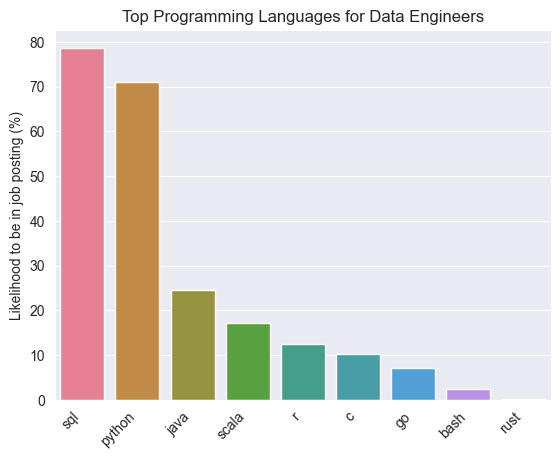

  keywords  counts  percentage
0      sql     838   78.685446
1   python     756   70.985915
2     java     262   24.600939
3    scala     182   17.089202
4        r     133   12.488263
5        c     110   10.328638
6       go      75    7.042254
7     bash      25    2.347418
8     rust       3    0.281690


In [58]:
filtered_keywords(df['job_languages'], prog_languages, title="Top Programming Languages for Data Engineers")

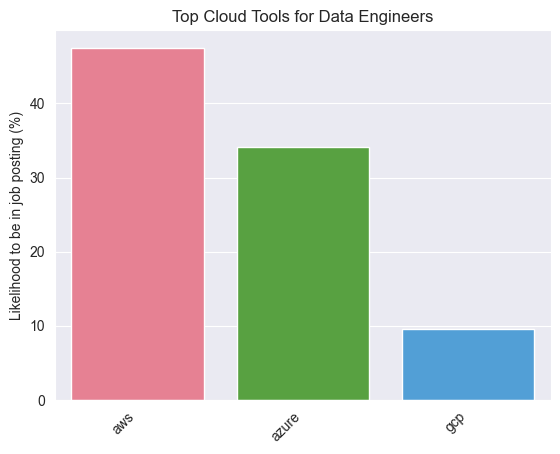

  keywords  counts  percentage
0      aws     506   47.511737
1    azure     363   34.084507
2      gcp     102    9.577465


In [59]:
filtered_keywords(df['job_cloud'], cloud_tools, title="Top Cloud Tools for Data Engineers")

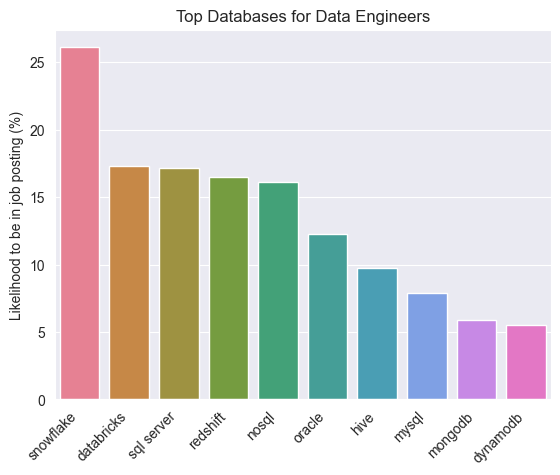

     keywords  counts  percentage
0   snowflake     278   26.103286
1  databricks     184   17.276995
2  sql server     183   17.183099
3    redshift     176   16.525822
4       nosql     172   16.150235
5      oracle     131   12.300469
6        hive     104    9.765258
7       mysql      84    7.887324
8     mongodb      63    5.915493
9    dynamodb      59    5.539906


In [60]:
filtered_keywords(df['job_databases'], databases, title="Top Databases for Data Engineers")

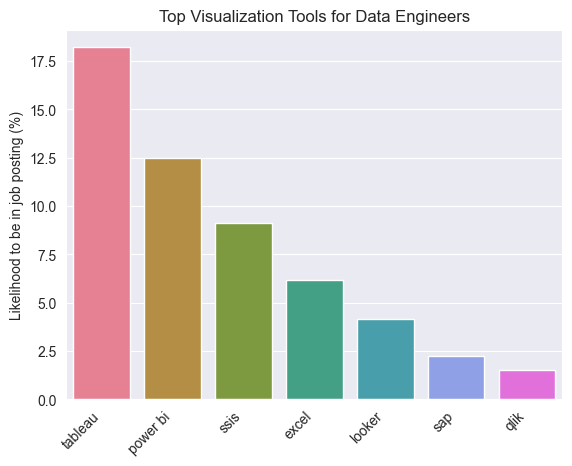

   keywords  counts  percentage
0   tableau     194   18.215962
1  power bi     133   12.488263
2      ssis      97    9.107981
3     excel      66    6.197183
4    looker      44    4.131455
5       sap      24    2.253521
6      qlik      16    1.502347


In [61]:
filtered_keywords(df['job_viz'], viz_tools, title="Top Visualization Tools for Data Engineers")

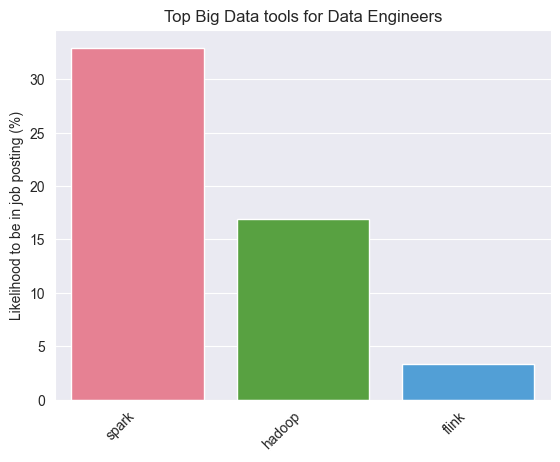

  keywords  counts  percentage
0    spark     351   32.957746
1   hadoop     180   16.901408
2    flink      35    3.286385


In [62]:
filtered_keywords(df['job_bigdata'], big_data, title="Top Big Data tools for Data Engineers")

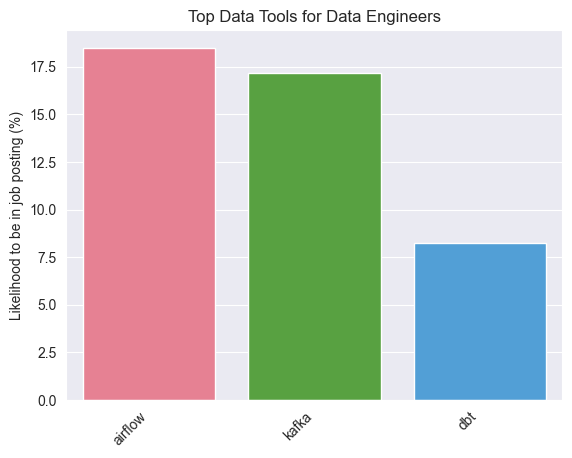

  keywords  counts  percentage
0  airflow     197   18.497653
1    kafka     183   17.183099
2      dbt      88    8.262911


In [63]:
filtered_keywords(df['job_datatools'], data_tools, title="Top Data Tools for Data Engineers")

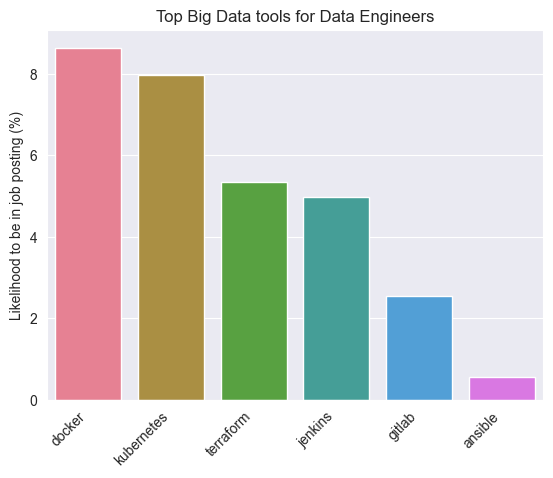

     keywords  counts  percentage
0      docker      92    8.638498
1  kubernetes      85    7.981221
2   terraform      57    5.352113
3     jenkins      53    4.976526
4      gitlab      27    2.535211
5     ansible       6    0.563380


In [64]:
filtered_keywords(df['job_devops'], devops, title="Top Big Data tools for Data Engineers")

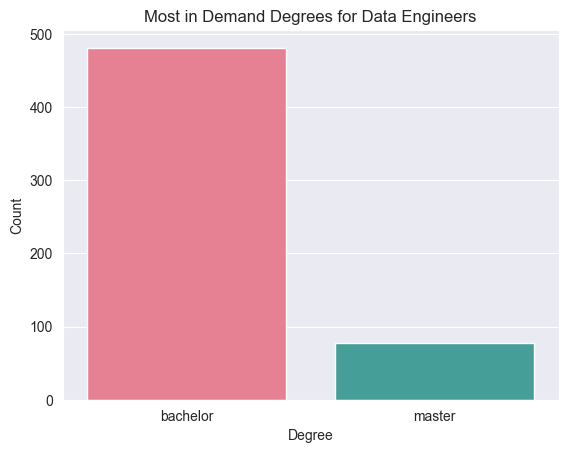

In [65]:
sns.countplot(data=df, x='job_education', palette="husl")

plt.title('Most in Demand Degrees for Data Engineers')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()

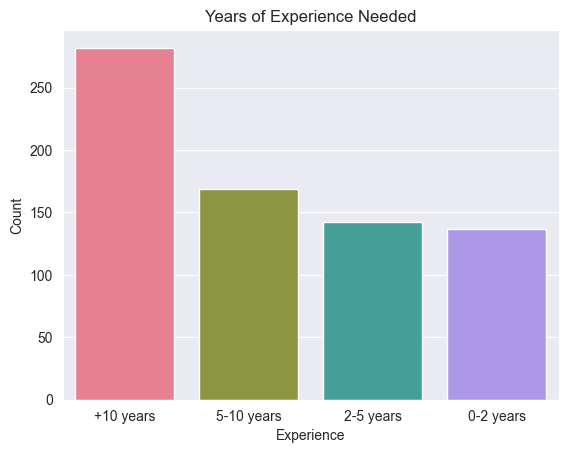

In [66]:
sns.countplot(data=df, x='job_experience', palette="husl", order = df['job_experience'].value_counts().index)

plt.title('Years of Experience Needed')
plt.xlabel('Experience')
plt.ylabel('Count')

plt.show()

Companies that are recruiting Data Engineers the most in Glassdoor

In [67]:
# top10 = df['company'].value_counts().head(10)
# sns.countplot(x='company', order=top10.index, data=df, palette="husl")
# plt.title("Top 10 Companies Recruiting Data Engineers in Glassdoor (03/2023)")
# plt.xticks(rotation=90)
# plt.show()

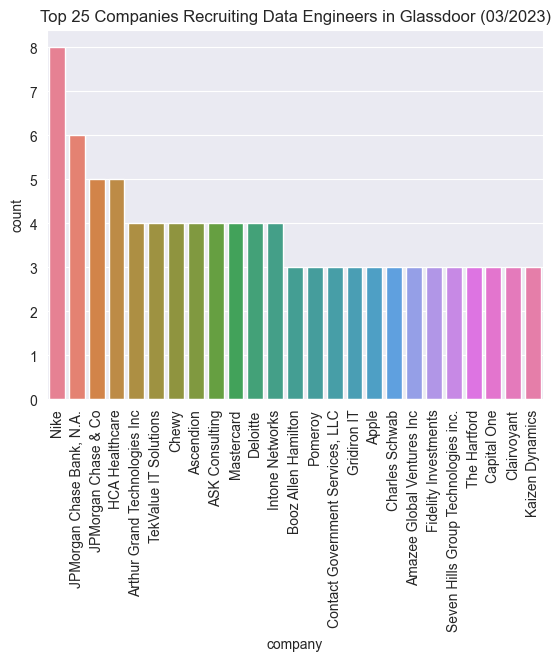

In [68]:
top25 = df['company'].value_counts().head(25)
sns.countplot(x='company', order=top25.index, data=df, palette="husl")
plt.title("Top 25 Companies Recruiting Data Engineers in Glassdoor (03/2023)")
plt.xticks(rotation=90)
plt.show()

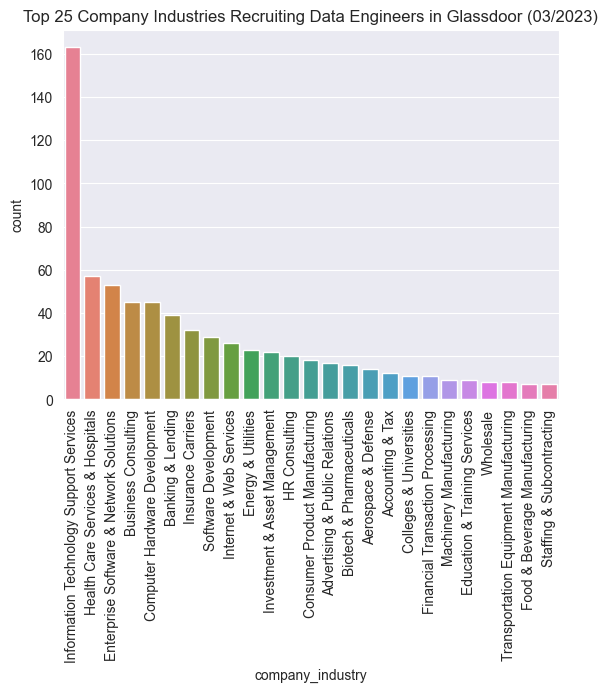

In [69]:
top25 = df['company_industry'].value_counts().head(25)
sns.countplot(x='company_industry', order=top25.index, data=df, palette="husl")
plt.title("Top 25 Company Industries Recruiting Data Engineers in Glassdoor (03/2023)")
plt.xticks(rotation=90)
plt.show()

### 💸 Data Engineer salary in United States

How much does a Data Engineer make in the United States?

In [70]:
avg_salary = df['salary_estimate'].mean()
print(f"Average base salary : ${round(avg_salary):,} per year")

Average base salary : $114,262 per year


In [71]:
min_salary = df['salary_estimate'].min()
max_salary = df['salary_estimate'].max()

print(f"Lowest salary : ${round(min_salary)} -- Highest salary : ${round(max_salary)}")

Lowest salary : $48600 -- Highest salary : $288000


#### Salary estimate distribution

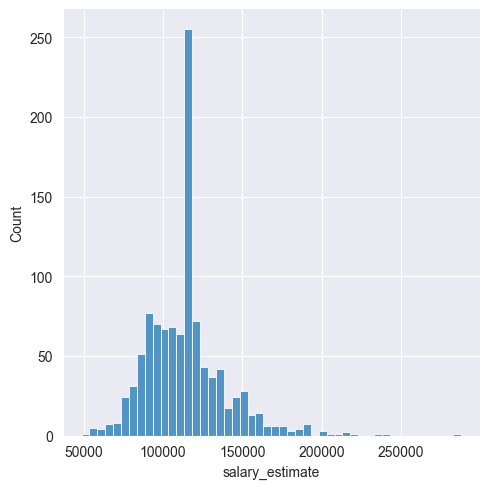

In [72]:
sns.displot(df['salary_estimate'])

<Axes: xlabel='company_rating', ylabel='Count'>

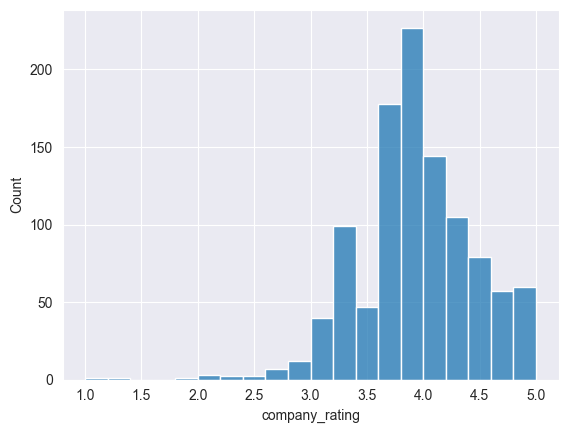

In [73]:
sns.histplot(df['company_rating'], bins=20)

<Axes: xlabel='company_age', ylabel='Count'>

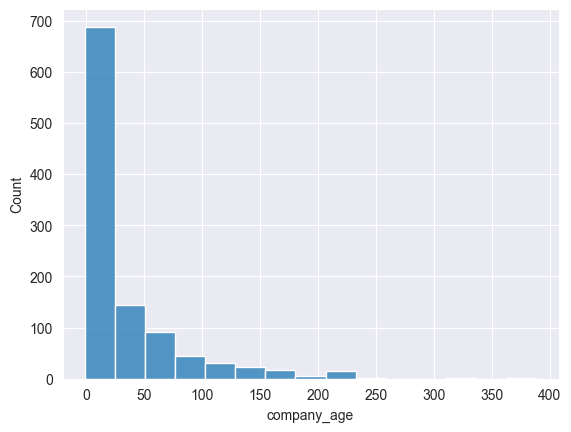

In [74]:
sns.histplot(df['company_age'], bins=15)

### --- chk if these states below have shortforms or not, if yes, change in dataset!

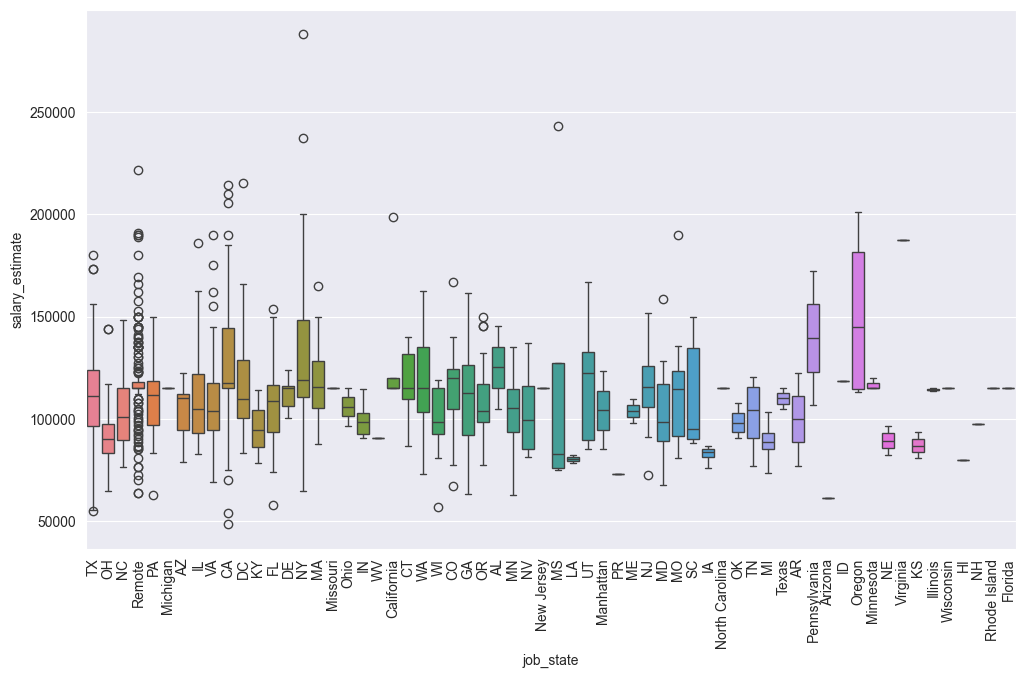

In [75]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.boxplot(data=df, x='job_state', y='salary_estimate', palette="husl")
plt.xticks(rotation=90)
plt.show()

### Getting rid of the outliers

In [76]:
Q1 = df['salary_estimate'].quantile(0.25)
Q3 = df['salary_estimate'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [77]:
upper_bound

161260.0

In [78]:
lower_bound

59244.0

#### state why we choosing 175000 (safe)----also why we dont need to do for lower bound!

In [79]:
df = df[df['salary_estimate'] <= 175000]

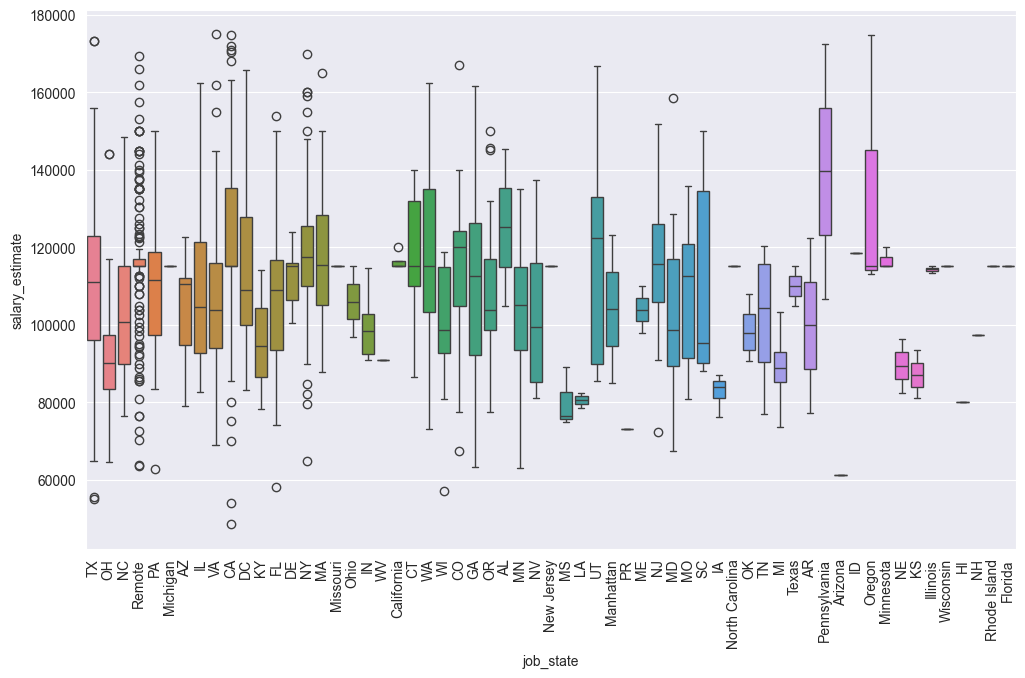

In [80]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.boxplot(data=df, x='job_state', y='salary_estimate', palette="husl")
plt.xticks(rotation=90)
plt.show()

In [81]:
df_cat = df[['job_state', 'seniority', 'company_revenue', 'company_age', 'company_industry', 'company_sector', 'company_type', 'company_size']]

graph for job_state: total = 61


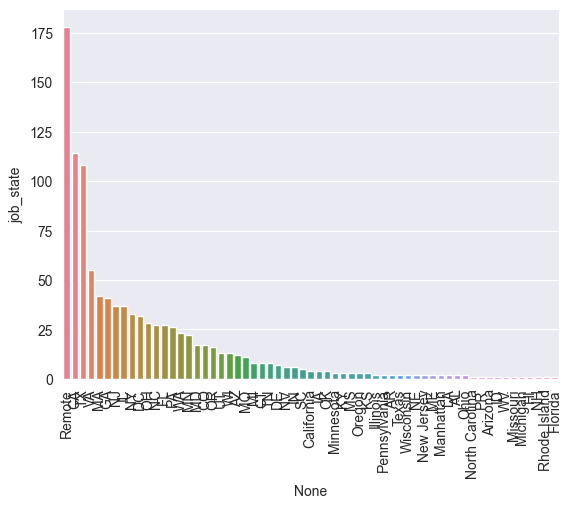

graph for seniority: total = 2


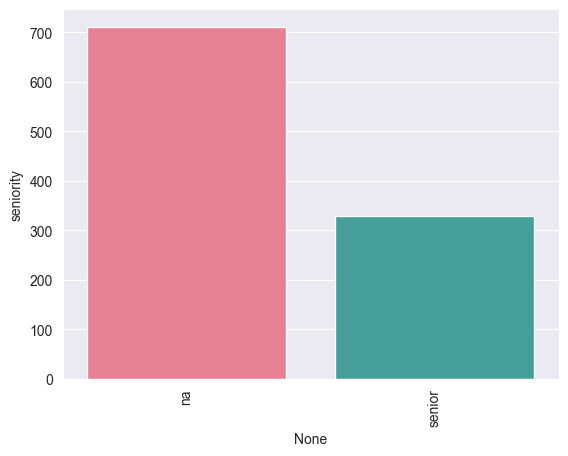

graph for company_revenue: total = 10


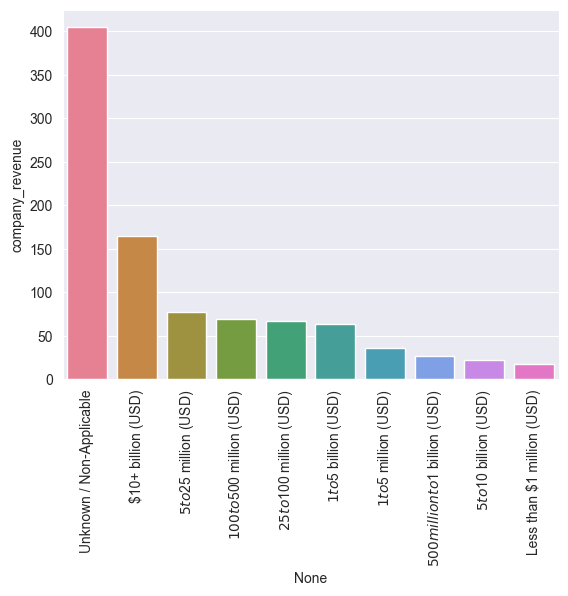

graph for company_age: total = 146


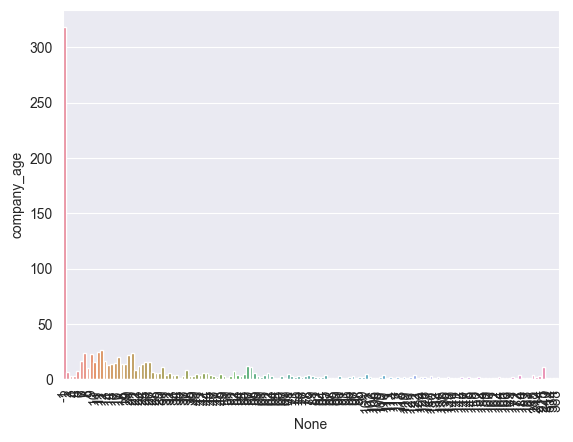

graph for company_industry: total = 79


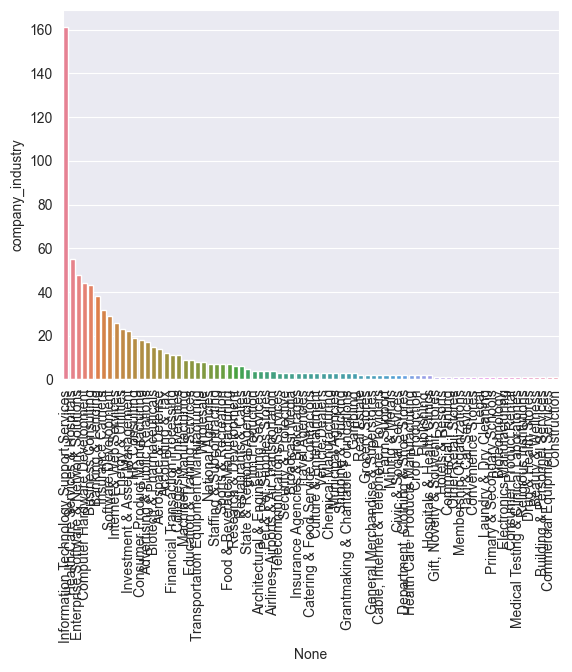

graph for company_sector: total = 25


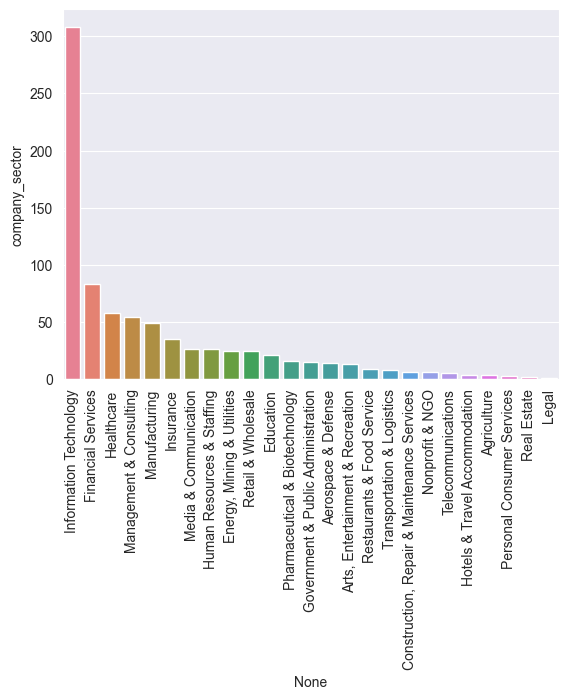

graph for company_type: total = 11


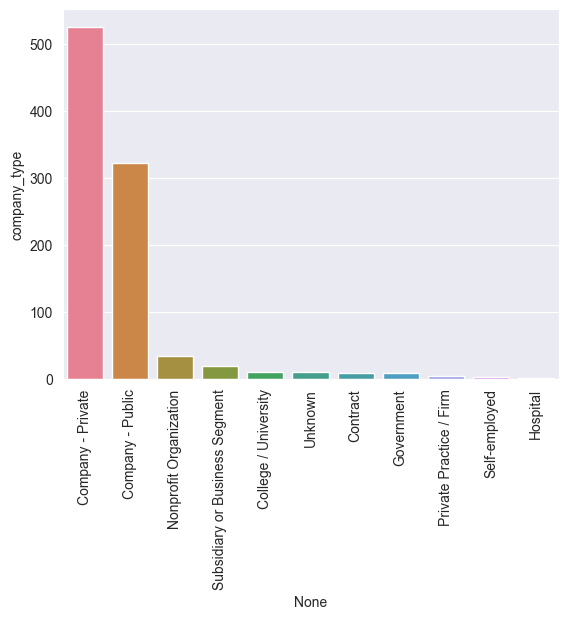

graph for company_size: total = 8


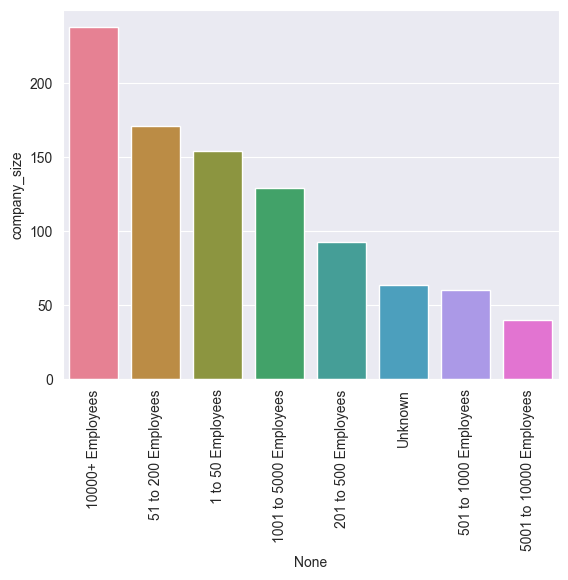

In [82]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num, palette="husl")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

### Summary of All Above Plots---

### Correlation Matrix - wht it means for us + significance 

<Axes: >

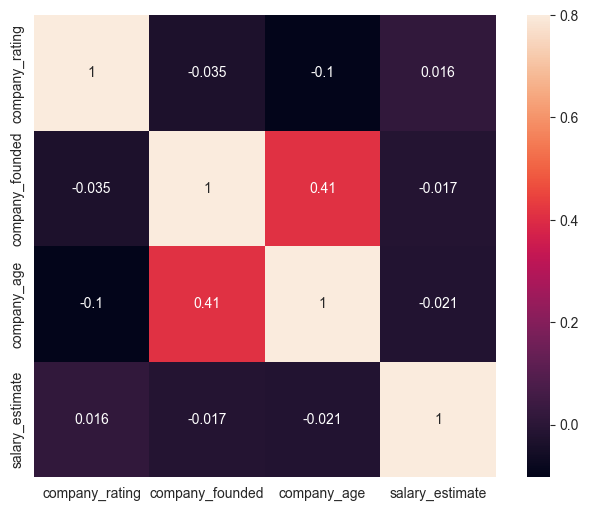

In [83]:
corr_mat = df[['company_rating', 'company_founded', 'company_age', 'salary_estimate']].corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr_mat, vmax=0.8, annot=True, square=True)

#### Let's see how the salary estimate changes based on different features

In [84]:
pd.pivot_table(df, index = 'job_education', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
job_education,
master,114364.77
bachelor,110665.18


#### Data Engineers with a Master's Degree get paid more

In [85]:
pd.pivot_table(df, index = 'seniority', values = 'salary_estimate').applymap('{:.2f}'.format)

,salary_estimate
seniority,
na,107739.27
senior,121526.30


See if rest all merge to na is req!!

#### Senior Data Engineers get paid more

In [86]:
# Creating the pivot table to ------
pivot_table = pd.pivot_table(df, index='job_state', values='salary_estimate').sort_values('salary_estimate', ascending=False)
pivot_table

,salary_estimate
job_state,
Pennsylvania,139600.000000
Oregon,134379.000000
AL,125208.000000
CA,123465.973684
NY,120204.121212
...,...
LA,80569.500000
MS,80182.333333
HI,80014.000000


In [87]:
# # Extracting the maximum and minimum salaries statewise
# max_state = pivot_table.iloc[0]
# min_state = pivot_table.iloc[-1]

# print(f"\nThe state with the highest average salary is {max_state.name} with a salary estimate of ${float(max_state['salary_estimate']):.2f}.")
# print(f"\nThe state with the lowest average salary is {min_state.name} with a salary estimate of ${float(min_state['salary_estimate']):.2f}.")

In [88]:
# Extracting the top 3 states with the highest and lowest average salaries
top_3_max_states = pivot_table.head(3)
top_3_min_states = pivot_table.tail(3)

print("\nTop 3 states with the highest average salary:")
for state, row in top_3_max_states.iterrows():
    print(f"{state}: ${float(row['salary_estimate']):.2f}")

print("\nTop 3 states with the lowest average salary:")
for state, row in top_3_min_states.iterrows():
    print(f"{state}: ${float(row['salary_estimate']):.2f}")



Top 3 states with the highest average salary:
Pennsylvania: $139600.00
Oregon: $134379.00
AL: $125208.00

Top 3 states with the lowest average salary:
HI: $80014.00
PR: $73140.00
Arizona: $61200.00


In [89]:
# Create the pivot table to --------
pivot_table_count = pd.pivot_table(df, index='job_state', values='salary_estimate', aggfunc='count').sort_values('salary_estimate', ascending=False)
pivot_table_count

,salary_estimate
job_state,
Remote,178
CA,114
TX,108
VA,55
MA,42
...,...
Rhode Island,1
Missouri,1
PR,1


In [90]:
# # Extract the max and min rows
# max_state = pivot_table_count.iloc[0]  # First row (max)
# min_state = pivot_table_count.iloc[-1]  # Last row (min)

# print(f"\nThe state with the highest number of job postings is {max_state.name} with {max_state['salary_estimate']} postings.")
# print(f"\nThe state with the lowest number of job postings is {min_state.name} with {min_state['salary_estimate']} posting(s).")

In [91]:
# # Extract the max and min values
# max_value = pivot_table_count['salary_estimate'].max()
# min_value = pivot_table_count['salary_estimate'].min()

# # Filter states with max and min counts
# max_states = pivot_table_count[pivot_table_count['salary_estimate'] == max_value]
# min_states = pivot_table_count[pivot_table_count['salary_estimate'] == min_value]

# # Display all states with the maximum count
# print(f"\nStates with the highest number of job postings : {max_value} postings -")
# for state in max_states.index:
#     print(f"> {state}")

# # Display all states with the minimum count
# print(f"\nStates with the lowest number of job postings : {min_value} posting(s) -")
# for state in min_states.index:
#     print(f"> {state}")

In [92]:
# Extract the max and min values
max_value = pivot_table_count['salary_estimate'].max()
min_value = pivot_table_count['salary_estimate'].min()

# Sort the pivot table by the count values in descending order
sorted_table = pivot_table_count.sort_values('salary_estimate', ascending=False)

# Get the top 3 states with the highest counts
top_3_states = sorted_table.head(3)

# Filter states with the minimum count
min_states = pivot_table_count[pivot_table_count['salary_estimate'] == min_value]

# Display top 3 states with the highest counts
print("\nTop 3 states with the highest number of job postings:")
for state, count in zip(top_3_states.index, top_3_states['salary_estimate']):
    print(f"> {state}: {count} postings")

# Display all states with the minimum count
print(f"\nStates with the lowest number of job postings : {min_value} posting(s) -")
for state in min_states.index:
    print(f"> {state}")



Top 3 states with the highest number of job postings:
> Remote: 178 postings
> CA: 114 postings
> TX: 108 postings

States with the lowest number of job postings : 1 posting(s) -
> ID
> WV
> Arizona
> Florida
> HI
> North Carolina
> Rhode Island
> Missouri
> PR
> NH
> Michigan


In [93]:
# Count the number of records for each state
state_counts = df['job_state'].value_counts()

# Filter the DataFrame for states with only one record
single_record_states = df[df['job_state'].isin(state_counts[state_counts == 1].index)]

# Find the state(s) with the highest salary estimate among these
highest_single_record_state = single_record_states[single_record_states['salary_estimate'] == single_record_states['salary_estimate'].max()]

# Display the result
for _, row in highest_single_record_state.iterrows():
    print(f"One of the state with a high salary estimate but only one record is {row['job_state']} with a salary estimate of ${row['salary_estimate']:.2f}.")


One of the state with a high salary estimate but only one record is ID with a salary estimate of $118643.00.


ID state has a high salary estimate of $118,643.00 but only one record, so we can't take that salary reliably. Similarly, there may be other states with high salary estimates but very few records. 

Therefore, in the model building phase, we are going to drop states with fewer than 15 records to ensure the reliability of our predictions.

In [94]:
pd.pivot_table(df, index = 'company_industry', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_industry,
Film Production,148737.00
Building & Personnel Services,145000.00
Travel Agencies,136734.33
Hospitals & Health Clinics,135000.00
Grantmaking & Charitable Foundations,133684.33
...,...
Architectural & Engineering Services,83901.75
Commercial Printing,82914.00
Mining & Metals,80500.00


In [95]:
# Sort the industries based on the salary estimate
sorted_industries = df.groupby('company_industry')['salary_estimate'].mean().sort_values(ascending=False)

# Code to display top and bottom 3 industries in a cleaner format
top_3_industries = sorted_industries.head(3)
bottom_3_industries = sorted_industries.tail(3)

# Display cleaner output for top 3 industries
print("Top 3 Industries with the Highest Average Salary Estimates:")
for industry, salary in top_3_industries.items():
    print(f"> {industry}: ${salary:,.2f}")

# Display cleaner output for bottom 3 industries
print("\nBottom 3 Industries with the Lowest Average Salary Estimates:")
for industry, salary in bottom_3_industries.items():
    print(f"> {industry}: ${salary:,.2f}")

Top 3 Industries with the Highest Average Salary Estimates:
> Film Production: $148,737.00
> Building & Personnel Services: $145,000.00
> Travel Agencies: $136,734.33

Bottom 3 Industries with the Lowest Average Salary Estimates:
> Mining & Metals: $80,500.00
> Construction: $71,504.00
> Medical Testing & Clinical Laboratories: $63,647.00


#### how this is helpful!!

In [96]:
pd.pivot_table(df, index = 'company_industry', values = 'salary_estimate', aggfunc = 'count').sort_values('salary_estimate', ascending = False)

,salary_estimate
company_industry,
Information Technology Support Services,161
Health Care Services & Hospitals,55
Enterprise Software & Network Solutions,48
Computer Hardware Development,44
Business Consulting,43
...,...
Legal,1
Beauty & Wellness,1
Medical Testing & Clinical Laboratories,1


#### Analysis

In [97]:
pd.pivot_table(df, index = 'company_size', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_size,
10000+ Employees,114187.68
Unknown,113277.55
1 to 50 Employees,112785.52
501 to 1000 Employees,112242.10
51 to 200 Employees,111011.36
5001 to 10000 Employees,110889.52
201 to 500 Employees,110194.00
1001 to 5000 Employees,109032.37


#### Analysis - here no clear pattern so doesnt matter as much?

In [98]:
pd.pivot_table(df, index = 'company_revenue', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_revenue,
$1 to $5 billion (USD),115274.73
$10+ billion (USD),114328.04
$100 to $500 million (USD),113591.97
Less than $1 million (USD),112846.12
Unknown / Non-Applicable,112181.00
$1 to $5 million (USD),111423.64
$500 million to $1 billion (USD),108181.04
$25 to $100 million (USD),108089.16
$5 to $25 million (USD),107932.55


#### Analysis - here no clear pattern so doesnt matter as much? or is it?

In [99]:
pd.pivot_table(df, index = 'company_type', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_type,
Self-employed,142500.00
Company - Public,114972.68
Company - Private,111462.39
College / University,108000.10
Subsidiary or Business Segment,107042.68
Private Practice / Firm,107015.20
Government,106799.44
Nonprofit Organization,103487.65
Unknown,101553.00


### Key Insights:

1. **Self-employed** earn the highest average salary (**$142,500**).
   - Likely due to specialized, entrepreneurial roles with higher compensation.
   
2. **Public companies** pay **$114,972.68** on average.
   - Larger financial resources and structured compensation packages.

3. **Private companies** pay **$111,462.39** on average.
   - Slightly less than public companies but still strong compensation, common in startups.

4. **Colleges/Universities** pay **$108,000.10**.
   - Lower salaries, but benefits like job stability and tenure are key.

5. **Nonprofits** and **Government** pay lower averages (**$103,487.65** and **$106,799.44**).
   - Compensation is lower, but job stability and personal fulfillment are attractive factors.

6. **Unknown** company types and **Contract** roles have lower salaries (**$101,553** and **$94,155.78**).
   - Likely due to less stability and lack of benefits.

### Implications for Model Building:

- **Company type** is a valuable feature for predicting salaries, reflecting industry-specific compensation trends.
- **Self-employed** and **Public companies** tend to offer the highest salaries, while **Nonprofits** and **Government** tend to offer lower salaries with other intangible benefits.


#### Let's build a wordcloud to show relative importance of the words in the job description

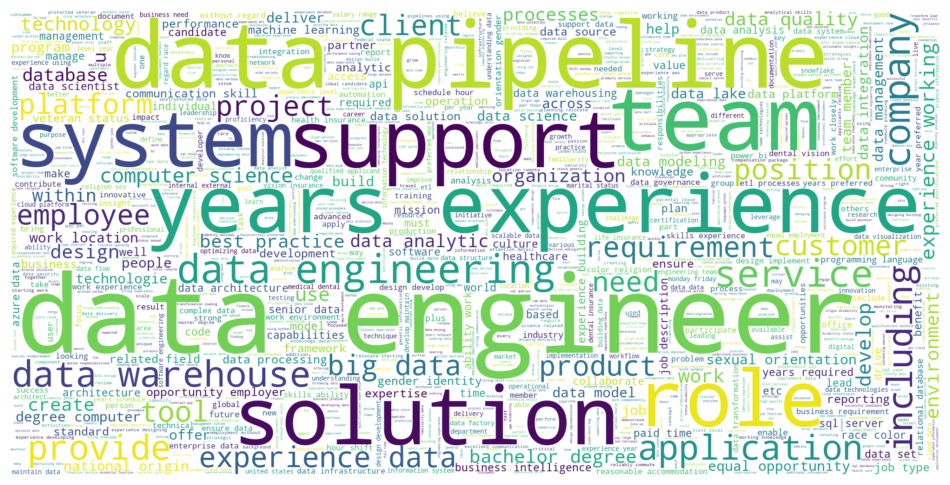

In [100]:
words = " ".join(df['job_description'])

def punctuation_stop(text):
    # to remove punctuation and stop words
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 1000, width=2000, height=1000)
wc.generate(text)

plt.figure(figsize=[12,30])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [101]:
data_path = '../data/processed/'

df.to_csv(data_path + "glassdoor-data-engineer-eda.csv", index=False)

#### State now that EDA is complete, we can fianlly move to building our model!

# III. 🤖 Model Building

#### Predicting the salary based on job state, company rating, company industry and other variables.

In [102]:
df = pd.read_csv("../data/processed/glassdoor-data-engineer-eda.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_datatools,job_devops,job_education,job_experience
0,SourceMantra,3.7,"Houston, TX",Data Engineer,"Hello,\nJob Title: Data Engineer\nLocation: Ho...",121500,Unknown,Company - Public,Financial Services,Accounting & Tax,...,na,['python'],['azure'],[],[],[],['airflow'],['kubernetes'],NaN,0-2 years
1,Cloud Shift Technologies LLC,5.0,"Columbus, OH",Data Engineer,"Data Engineer\nCleveland, Ohio\nVideo Intervie...",93600,1 to 50 Employees,Company - Private,NaN,NaN,...,na,"['python', 'sql']",[],['tableau'],[],"['spark', 'hadoop']",['kafka'],[],bachelor,5-10 years
2,Fortek IT Solutions USA,3.9,"Denver, NC",Data Engineer,JD:\nEngineer requirement:\n· Bachelor's degre...,126000,NaN,NaN,NaN,NaN,...,na,"['sql', 'c']",[],"['power bi', 'tableau']",['snowflake'],[],[],[],bachelor,0-2 years
3,Wiliot,4.5,Remote,Data Engineer,Wiliot was founded by the team that invented o...,115203,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,...,na,"['python', 'sql', 'scala', 'java']","['azure', 'aws', 'gcp']",[],"['databricks', 'nosql']",['spark'],['kafka'],[],bachelor,NaN
4,wiselinkglobal,3.9,"Plano, TX",Data Engineer,"Position: Data Engineer\nLocation: Plano, TX\n...",100000,NaN,NaN,NaN,NaN,...,na,"['scala', 'sql']",['aws'],['tableau'],"['redshift', 'snowflake']",['spark'],"['airflow', 'kafka']",[],NaN,0-2 years


In [103]:
df.shape

(1039, 25)

#### Feature Engineering

##### Making a new dataframe with relevant features for the regression model

In [104]:
cols_model = ['job_state', 'seniority', 'job_education', 'job_experience', 'company_industry', 'company_rating', 'salary_estimate']

df_model = df[cols_model]
df_model.head()

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,TX,na,NaN,0-2 years,Accounting & Tax,3.7,121500
1,OH,na,bachelor,5-10 years,NaN,5.0,93600
2,NC,na,bachelor,0-2 years,NaN,3.9,126000
3,Remote,na,bachelor,NaN,Computer Hardware Development,4.5,115203
4,TX,na,NaN,0-2 years,NaN,3.9,100000


#### Dropping some states and company industries that have below 5 data points.

In [105]:
jobstate_count = df_model['job_state'].value_counts()
jobstate_count

Remote          178
CA              114
TX              108
VA               55
MA               42
               ... 
Michigan          1
HI                1
NH                1
Rhode Island      1
Florida           1
Name: job_state, Length: 61, dtype: int64

In [106]:
states_g5 = jobstate_count[jobstate_count > 5].index.tolist()

df_model = df_model[df_model["job_state"].isin(states_g5)]
df_model['job_state'].value_counts()

Remote    178
CA        114
TX        108
VA         55
MA         42
GA         41
NJ         37
IL         37
NY         33
DC         32
OH         28
FL         27
NC         27
PA         26
WA         23
MN         22
CO         17
MD         17
OR         16
WI         13
UT         13
AZ         12
MO         11
TN          8
MI          8
CT          8
DE          7
NV          6
IN          6
Name: job_state, dtype: int64

#### say as was needed and stated in eda before, also now ready to proceed!

### For the Predict Salary page ---- frame it better!!!

In [107]:
df_model['company_rating'].unique()

array([3.7, 5. , 3.9, 4.5, 4.1, 4.4, 2.9, 3.1, 1.8, 3.8, 3.4, 4.6, 4.3,
       3.5, 4. , 3.6, 4.2, 2.5, 3. , 4.8, 3.2, 4.7, 3.3, 4.9, 2.8, 2.7,
       1. , 2.6, 2. , 2.2, 2.3, 1.3])

In [108]:
df_model['company_industry'].unique()

array(['Accounting & Tax', nan, 'Computer Hardware Development',
       'Information Technology Support Services',
       'Enterprise Software & Network Solutions', 'Shipping & Trucking',
       'Software Development', 'Primary & Secondary Schools',
       'Investment & Asset Management',
       'Health Care Services & Hospitals', 'Biotech & Pharmaceuticals',
       'Banking & Lending', 'HR Consulting',
       'Consumer Product Manufacturing', 'Research & Development',
       'Internet & Web Services', 'Energy & Utilities',
       'Aerospace & Defense', 'Film Production',
       'Advertising & Public Relations', 'Insurance Carriers',
       'Sports & Recreation', 'Business Consulting',
       'Machinery Manufacturing', 'Grantmaking & Charitable Foundations',
       'Real Estate', 'Religious Institutions',
       'Food & Beverage Manufacturing',
       'Financial Transaction Processing', 'Gambling',
       'Health Care Products Manufacturing', 'Wholesale',
       'Transportation Equipme

#### why we found this?! and why essential to do this!

### One Hot Encoding

In [109]:
le_state = LabelEncoder()

df_model['job_state'] = le_state.fit_transform(df_model['job_state'])
df_model['job_state'].unique()

array([24, 19, 15, 22, 21,  0,  8, 26,  1,  4,  6,  5, 18, 10,  9,  3, 27,
       28,  2,  7, 20, 13, 17, 25, 16, 11, 14, 23, 12])

In [110]:
le_sen = LabelEncoder()

df_model['seniority'] = le_sen.fit_transform(df_model['seniority'])
df_model['seniority'].unique()

array([0, 1])

In [111]:
le_edu = LabelEncoder()

df_model['job_education'] = le_edu.fit_transform(df_model['job_education'])
df_model['job_education'].unique()

array([2, 0, 1])

In [112]:
le_indu = LabelEncoder()

df_model['company_industry'] = le_indu.fit_transform(df_model['company_industry'])
df_model['company_industry'].unique()

array([ 0, 77, 18, 44, 29, 66, 67, 59, 48, 41,  7,  5, 39, 20, 63, 47, 28,
        2, 31,  1, 46, 68, 11, 51, 37, 61, 62, 33, 32, 34, 40, 76, 73, 25,
       16, 42, 10, 12, 58, 35, 14,  3,  4, 56, 21, 70, 23, 17, 69, 74,  6,
       60, 22, 45, 64, 26, 72, 65, 52, 15, 54, 49, 27, 30,  8,  9, 13, 36,
       24, 71, 53, 75, 38, 43, 57, 55, 50, 19])

In [113]:
unique_company_ratings = np.sort(df_model['company_rating'].unique())
unique_company_ratings

array([1. , 1.3, 1.8, 2. , 2.2, 2.3, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1,
       3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4,
       4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [114]:
le_rating = LabelEncoder()

df_model['company_rating'] = le_rating.fit_transform(df_model['company_rating'])
df_model['company_rating'].unique()

array([18, 31, 20, 26, 22, 25, 10, 12,  2, 19, 15, 27, 24, 16, 21, 17, 23,
        6, 11, 29, 13, 28, 14, 30,  9,  8,  0,  7,  3,  4,  5,  1])

In [115]:
le_exp = LabelEncoder()

df_model['job_experience'] = le_exp.fit_transform(df_model['job_experience'])
df_model['job_experience'].unique()

array([1, 3, 4, 2, 0])

In [116]:
df_model.head()

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,24,0,2,1,0,18,121500
1,19,0,0,3,77,31,93600
2,15,0,0,1,77,20,126000
3,22,0,0,4,18,26,115203
4,24,0,2,1,77,20,100000


<Axes: >

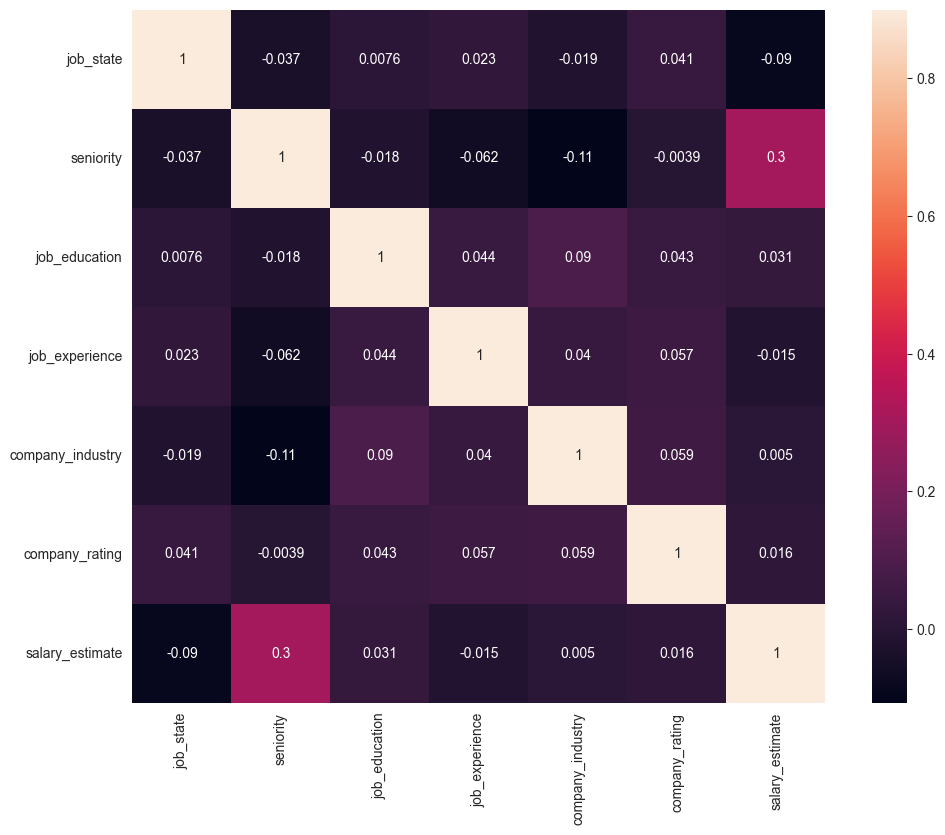

In [117]:
corr_mat = df_model.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat, vmax=0.9, annot=True, square=True)

#### The salary is moderatly correlated with the seniority, company industry and company rating. Suprisingly it is negatively correlated with the job experience needed and the job state.

### Explain more and possible reasons!!!

Mean Squared Error: 366040139.62
R-squared: -0.00
PCA Components: [[ 0.41006194 -0.4659155  -0.61818937 -0.48230058]
 [-0.74949375 -0.35382289  0.18223771 -0.52901597]]


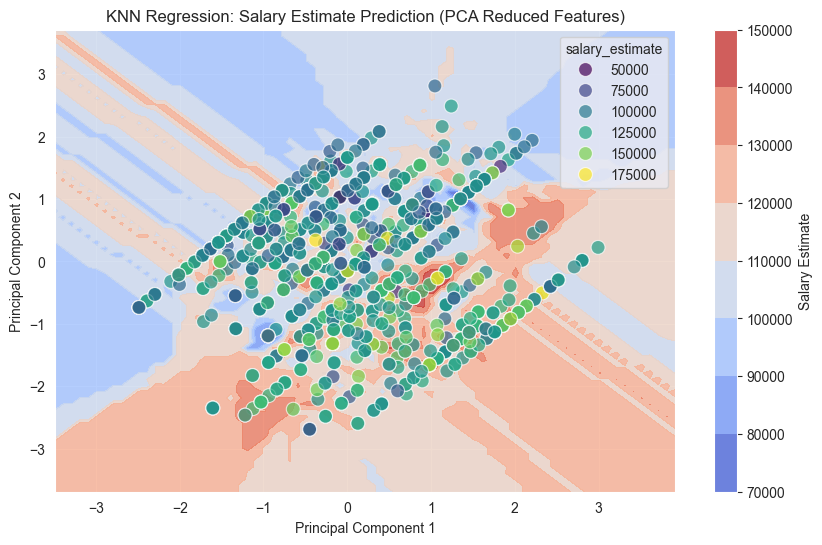

In [144]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df_model' is your DataFrame and preprocessing steps are completed

# Selecting relevant columns for KNN (excluding non-numeric features and selecting a target)
features = df_model[['seniority', 'job_education', 'job_experience', 'company_rating']]
target = df_model['salary_estimate']  # Adjust target column to be 'salary_estimate'

# Handling missing values if necessary (dropping rows with missing target values)
df_model.dropna(subset=['salary_estimate'], inplace=True)

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Applying KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune the number of neighbors
knn.fit(X_train, y_train)

# Predicting the test set
y_pred = knn.predict(X_test)

# Checking the performance (R-squared and Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# After fitting the PCA model
print("PCA Components:", pca.components_)

# Fitting KNN model to the reduced features
knn_reduced = KNeighborsRegressor(n_neighbors=5)
knn_reduced.fit(reduced_features, target)

# Defining a grid for plotting the predictions (using reduced features from PCA)
x_min, x_max = reduced_features[:, 0].min() - 1, reduced_features[:, 0].max() + 1
y_min, y_max = reduced_features[:, 1].min() - 1, reduced_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predicting salary estimates over the grid using the PCA-reduced features
Z = knn_reduced.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)

# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Scatter plot for the actual data points
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=target, palette='viridis', s=100, alpha=0.7)
plt.title('KNN Regression: Salary Estimate Prediction (PCA Reduced Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Salary Estimate')
plt.show()


### Insights from KNN Salary Prediction Model

- **Visualization**:
  - The plot shows predicted salary estimates based on PCA-reduced features, with colors indicating salary ranges.
  - Warmer colors (yellow/red) represent higher salary predictions, while cooler colors (blue/purple) represent lower predictions.

- **Model Performance**:
  - **R-squared: -0.00**: The model explains very little of the salary variance.
  - **Mean Squared Error: 366040139.62**: The predictions are far from the true values.

- **Possible Reasons for Poor Performance**:
  - **Model Choice**: KNN may not capture complex relationships in the data.
  - **Feature Selection**: Important features may need more transformation or additional features.
  - **Scaling/Preprocessing**: Other steps like feature engineering or handling outliers may improve results.

- **Improvement Suggestions**:
  - **Hyperparameter Tuning**: Use cross-validation to find the optimal number of neighbors and other parameters.
  - **Try Other Algorithms**: Consider using Random Forest, Gradient Boosting, or Neural Networks.
  - **Feature Engineering**: Add new features or combine existing ones (e.g., `job_experience` + `seniority`).


In [145]:
# # Check for duplicates
# duplicates = df[df.duplicated()]
# print(duplicates)




In [146]:
# # Check for missing values or rows that might have been dropped
# missing_values = df.isnull().sum()
# print(missing_values)

### Multiple Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [148]:
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [150]:
model = LinearRegression()

In [151]:
model.fit(X_train, y_train)

LinearRegression()

In [152]:
predictions = model.predict(X_test)

In [153]:
print(f'Mean Absolute Error : ${round(mean_absolute_error(y_test, predictions), 2)}')

Mean Absolute Error : $14688.41


In [154]:
error = np.sqrt(mean_squared_error(y_test, predictions))
print("Error : ${:,.02f}".format(error))   

Error : $19,082.44


Mean Absolute Error: $14,688.41
Mean Squared Error: $364,139,500.15
Accuracy: 86.11%
Root Mean Squared Error: $19,082.44
R-squared: 0.12


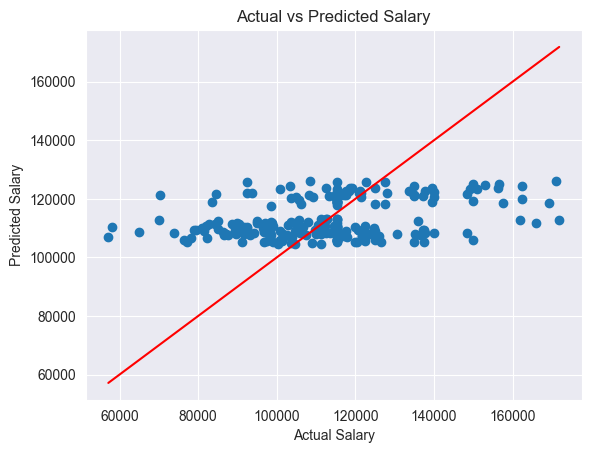

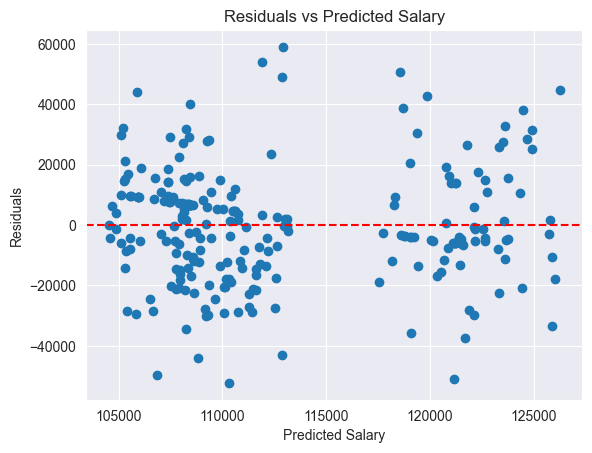

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_model is already defined and contains the necessary data
X = df_model.drop("salary_estimate", axis=1)  # Features
y = df_model["salary_estimate"].values  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model with various metrics
mae = mean_absolute_error(y_test, predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, predictions)   # Mean Squared Error
rmse = np.sqrt(mse)                            # Root Mean Squared Error
r2 = r2_score(y_test, predictions)              # R-squared (coefficient of determination)

# Calculate Mean Absolute Percentage Error (MAPE) and accuracy
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)

# Print out the results
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Mean Squared Error: ${mse:,.2f}")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"R-squared: {r2:.2f}")


# To check the accuracy and error distribution
# Plot predicted vs actual values
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

# Plot residuals (prediction errors)
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Salary')
plt.show()


### Key Insights from Multiple Linear Regression

1. **Mean Absolute Error (MAE)**:
   - The MAE is **$14,688.41**, meaning that on average, the model's salary prediction is off by this amount. This is a significant error considering the salary range.

2. **Mean Squared Error (MSE)**:
   - The MSE is **$364,139,500.15**, which is quite large, indicating that there are some substantial prediction errors in the model. MSE gives more weight to larger errors due to the squared term, which is a reason for the high value.

3. **Root Mean Squared Error (RMSE)**:
   - The RMSE is **$19,082.44**, which is a more interpretable version of the error (in the same units as salary). This suggests that while predictions are close, they still have a significant deviation.

4. **R-squared (R²)**:
   - The **R²** value is **0.12**, indicating that the model explains only 12% of the variance in salary estimates. This is quite low, meaning the linear model is not a good fit for predicting salary from the given features. The remaining 88% of the variation is not captured by the model, suggesting the presence of other factors or more complex relationships not accounted for.

### Conclusion:
- The performance of the multiple linear regression model is **poor** based on these metrics. The low R² indicates that the model fails to capture much of the underlying variation in the data. 
- The relatively high MAE and RMSE further suggest that the predictions are not very accurate, implying that more advanced models or feature engineering might be needed to improve the predictive accuracy for salary estimates.


### Random Forest Regressor Model

In [165]:
from sklearn.ensemble import RandomForestRegressor

In [166]:
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

In [167]:
max_depth = [None, 2, 4, 6, 8, 10, 12]

parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(n_estimators = 100, random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [168]:
regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(f'Mean Absolute Error : ${round(mean_absolute_error(y_test, y_pred), 2)}')
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Error : ${:,.02f}".format(error))    

Mean Absolute Error : $14514.34
Error : $19,482.10


In [169]:
errors = abs(y_pred - y_test)

In [170]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 86.28 %


Mean Absolute Error : $14514.34
Mean Squared Error : $379552108.56
Root Mean Squared Error : $19482.1
Accuracy: 86.28%
R-squared: 0.08


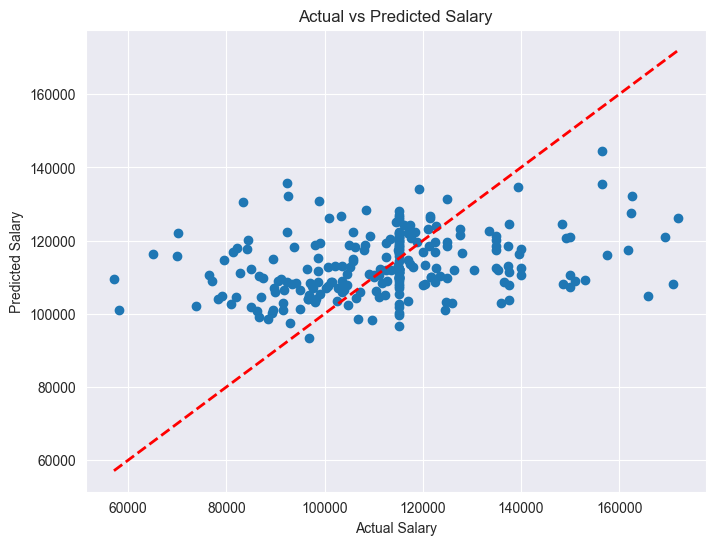

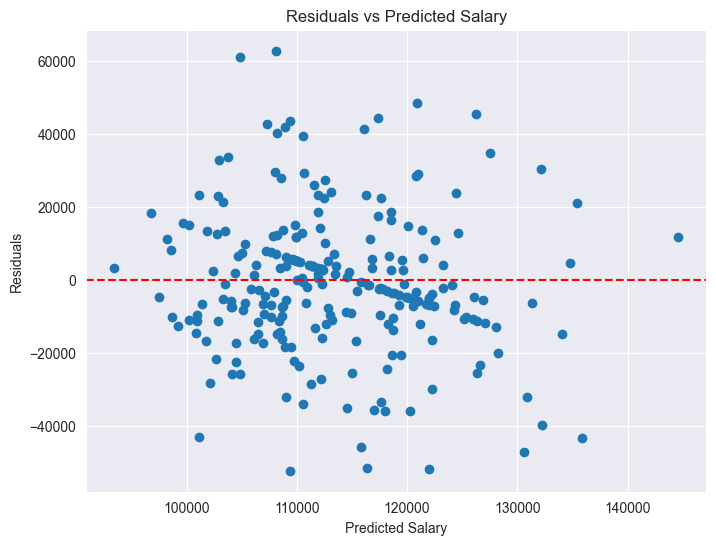

In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

# Define hyperparameters and initialize Random Forest Regressor
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

# Best estimator from GridSearchCV
regressor = gs.best_estimator_

# Fit model
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Mean Absolute Percentage Error (MAPE) & Accuracy
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)

# R-squared score
r2 = r2_score(y_test, y_pred)

# Print out the results
print(f'Mean Absolute Error : ${round(mae, 2)}')
print(f'Mean Squared Error : ${round(mse, 2)}')
print(f'Root Mean Squared Error : ${round(rmse, 2)}')
print(f'Accuracy: {round(accuracy, 2)}%')
print(f'R-squared: {round(r2, 2)}')

# Additional visualizations
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Salary")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Salary")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.show()


### Random Forest Regressor Results

- **Mean Absolute Error (MAE): $14,514.34**
  - **Interpretation**: On average, the model's predictions are off by $14,514.
  - **Conclusion**: The model's predictions are fairly accurate, but there's still room for improvement.

- **Mean Squared Error (MSE): $379,552,108.56**
  - **Interpretation**: High value indicates large errors in some predictions.
  - **Conclusion**: The model makes significant prediction errors, potentially due to outliers.

- **Root Mean Squared Error (RMSE): $19,482.10**
  - **Interpretation**: The model's average prediction error is around $19,482.
  - **Conclusion**: Relatively large error, indicating room for improvement.

- **Accuracy: 86.28%**
  - **Interpretation**: The model correctly predicts about 86% of salary values in terms of percentage error.
  - **Conclusion**: High accuracy, but large errors remain in some predictions.

- **R-squared (R²): 0.08**
  - **Interpretation**: The model explains only 8% of the variance in salary data.
  - **Conclusion**: The model is underfitting, not capturing much of the salary variation.

### Overall Analysis:
- While the **accuracy** is decent, the **low R-squared** (0.08) and large errors suggest that the model is not capturing much of the underlying salary data patterns.
- The model's performance could be improved through **hyperparameter tuning**, **better feature engineering**, and addressing **outliers**.

### Next Steps:
- **Tune hyperparameters** (e.g., `n_estimators`, `max_depth`).
- **Improve feature selection** and consider transformations.
- Investigate **outliers** or **noisy data**.
- Try other models (e.g., Gradient Boosting, XGBoost).


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10

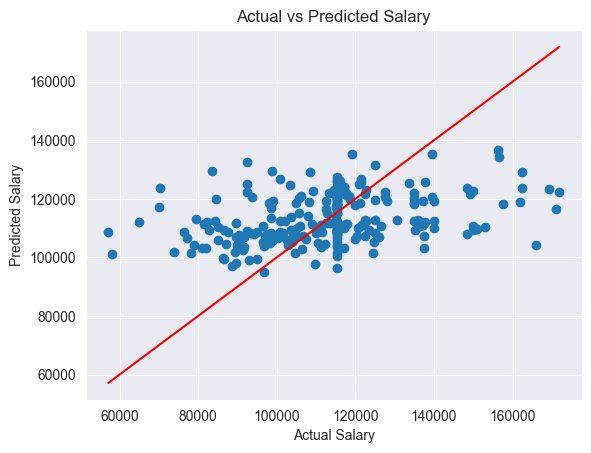

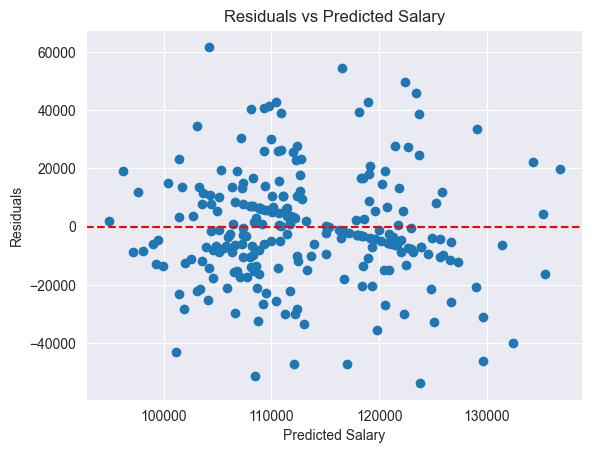

In [174]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming df_model is already defined and contains the necessary data
# X = Features, y = Target variable
X = df_model.drop("salary_estimate", axis=1)  # Features
y = df_model["salary_estimate"].values  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Using the best model from grid search
best_rf = grid_search.best_estimator_

# Fit the model
best_rf.fit(X_train, y_train)

# Predictions on test data
y_pred = best_rf.predict(X_test)

# Evaluate the model with various metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                        # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)              # R-squared (coefficient of determination)

# Print out the results
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Mean Squared Error: ${mse:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"R-squared: {r2:.2f}")

# Calculate Accuracy (MAPE)
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print(f"Accuracy: {accuracy:.2f}%")

# Cross-Validation Scores (to validate generalization)
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {cv_scores.mean():,.2f}")

# Visualizations: Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

# Residual Plot (Prediction errors)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Salary')
plt.show()


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5

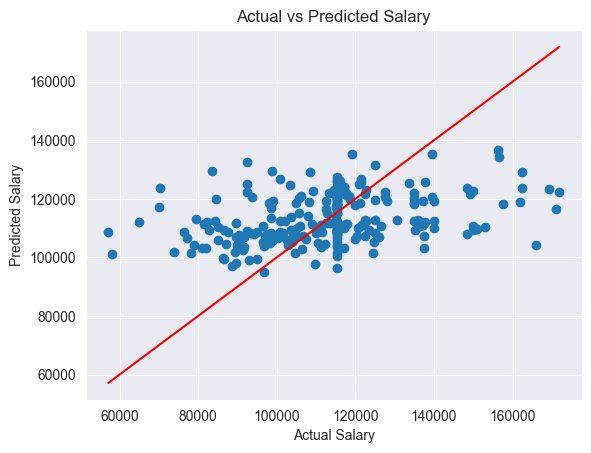

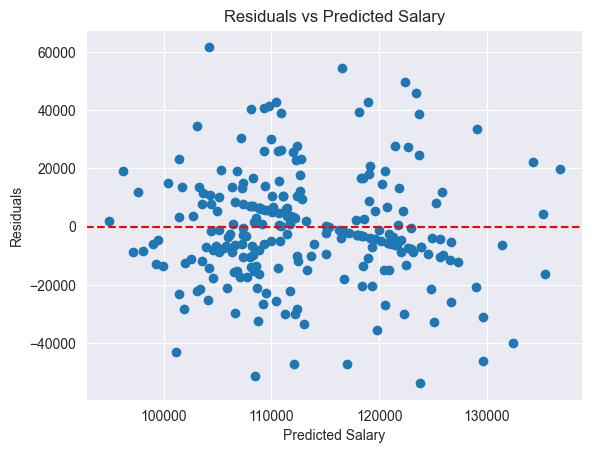

['scaler.joblib']

In [175]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib  # For saving the model

# Assuming df_model is already defined and contains the necessary data
# X = Features, y = Target variable
X = df_model.drop("salary_estimate", axis=1)  # Features
y = df_model["salary_estimate"].values  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Scaling (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Using the best model from grid search
best_rf = grid_search.best_estimator_

# Fit the model on the training data
best_rf.fit(X_train, y_train)

# Predictions on test data
y_pred = best_rf.predict(X_test)

# Evaluate the model with various metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                        # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)              # R-squared (coefficient of determination)

# Print out the results
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Mean Squared Error: ${mse:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"R-squared: {r2:.2f}")

# Calculate Accuracy (MAPE)
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print(f"Accuracy: {accuracy:.2f}%")

# Cross-Validation Scores (to validate generalization)
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {cv_scores.mean():,.2f}")

# Visualizations: Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

# Residual Plot (Prediction errors)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Salary')
plt.show()

# Training the model on the entire dataset (for production use)
regressor = RandomForestRegressor(max_depth=6, random_state=0)
regressor.fit(X, y)

# Save the trained model using joblib
joblib.dump(regressor, 'random_forest_model.joblib')

# Save the scaler as well, if needed for transforming future data
joblib.dump(scaler, 'scaler.joblib')


### **Random Forest Regressor Model Results**

#### **Best Parameters**:
- **max_depth**: 5
- **min_samples_leaf**: 4
- **min_samples_split**: 2
- **n_estimators**: 100

These parameters were identified through **GridSearchCV** and represent the optimal configuration for this model. Here's what they mean:
- **max_depth=5**: Limits the depth of each decision tree to 5 levels, helping reduce overfitting.
- **min_samples_leaf=4**: Each leaf node must have at least 4 data points, improving generalization.
- **min_samples_split=2**: Allows the tree to split on very small subsets, avoiding underfitting.
- **n_estimators=100**: The model uses 100 trees in the forest, which is a common setting to balance performance and computational cost.

#### **Performance Metrics**:

1. **Mean Absolute Error (MAE)**:
   - **$14,285.96**: The model's predictions are, on average, off by approximately **$14,285.96**.

2. **Mean Squared Error (MSE)**:
   - **$360,508,788.75**: Reflects the squared errors of predictions. A higher value suggests significant deviations from the actual values, possibly due to large errors or outliers.

3. **Root Mean Squared Error (RMSE)**:
   - **$18,987.07**: The model's predictions are, on average, **$18,987.07** away from the actual salary values.

4. **R-squared (R²)**:
   - **0.13**: This indicates that the model only explains **13%** of the variance in salary estimates, suggesting the model does not fit the data well.

5. **Accuracy (MAPE)**:
   - **86.55%**: **86.55%** of predictions are within an acceptable error range, meaning the model is generally accurate but could be improved.

6. **Cross-Validation MSE**:
   - **-397,044,351.79**: The negative MSE reflects that the model is minimizing the error, but still not performing optimally across cross-validation folds.

---

### **Summary & Suggestions for Improvement**:

- **Overall Model Fit**: The model has **moderate accuracy** (**86.55%**), but its **R² value (0.13)** indicates a weak fit, explaining only 13% of the variance.
  
- **Potential Improvements**:
  - **Feature Engineering**: Consider adding more features or improving existing ones (e.g., encoding categorical variables, interaction terms).
  - **Hyperparameter Tuning**: Further refine parameters like `min_samples_split`, `min_samples_leaf`, and `max_depth` or experiment with a higher number of estimators.
  - **Explore Other Models**: Try boosting methods like **Gradient Boosting** or **XGBoost** to see if they perform better.
  - **Cross-Validation Refinement**: Fine-tune the number of folds or use stratified sampling for better stability.

- **Next Steps**:
  - Investigate potential data issues, like multicollinearity or noisy data, that may affect model performance.
  - Test other regression algorithms (e.g., **Gradient Boosting**) that could outperform Random Forest on this task.

---

### **Conclusion**:
The Random Forest model provides useful insights but can be improved with better feature engineering, hyperparameter tuning, and possibly switching to more advanced models like **Gradient Boosting** or **XGBoost**.


Training the model on all the dataset so we can export it and use it in production

In [176]:
regressor.fit(X, y)

RandomForestRegressor(max_depth=6, random_state=0)

Variable Importances

In [177]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(cols_model, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: job_state            Importance: 0.27
Variable: seniority            Importance: 0.23
Variable: company_industry     Importance: 0.2
Variable: company_rating       Importance: 0.18
Variable: job_experience       Importance: 0.08
Variable: job_education        Importance: 0.04


[None, None, None, None, None, None]

Let's test our model on an example

In [178]:
# job_state, seniority, job_education, job_experience, company_industry, company_rating

X_example =  np.array([["CA", "senior", "bachelor", "0-2 years", "Information Technology Support Services", 4.5]])

In [179]:
X_example[:, 0] = le_state.transform(X_example[:,0])
X_example[:, 1] = le_sen.transform(X_example[:,1])
X_example[:, 2] = le_edu.transform(X_example[:,2])
X_example[:, 3] = le_exp.transform(X_example[:,3])
X_example[:, 4] = le_indu.transform(X_example[:,4])
X_example[:, 5] = le_rating.transform(X_example[:,5])

X_example = X_example.astype(float)
X_example

array([[ 1.,  1.,  0.,  1., 44., 26.]])

In [181]:
y_pred = regressor.predict(X_example)
salary = int(y_pred[0])
print(f"Predicted salary: ${salary:,}")

Predicted salary: $127,116


#### For a senior data engineer who's looking to work in California (CA) state, with a bachelor, 0-2 years of experience and in a company in the IT Support Services industry that has a 4.5 rating on Glassdoor, he is expected to get $128,369 /year.

Let's test our model after importing it from the pickle file

In [142]:
regressor_loaded = data["model"]
le_state = data["le_state"]
le_sen = data["le_sen"]
le_edu = data["le_edu"]
le_exp = data["le_exp"]
le_indu = data["le_indu"]
le_rating = data["le_rating"]

In [143]:
y_pred = regressor_loaded.predict(X_example)
salary = int(y_pred[0])
print(f"Predicted salary: ${salary:,}")

Predicted salary: $127,116


Mean Absolute Error: $14,117.41
Mean Squared Error: $369,902,778.36
Root Mean Squared Error: $19,232.86
R-squared: 0.10
Accuracy: 86.64%


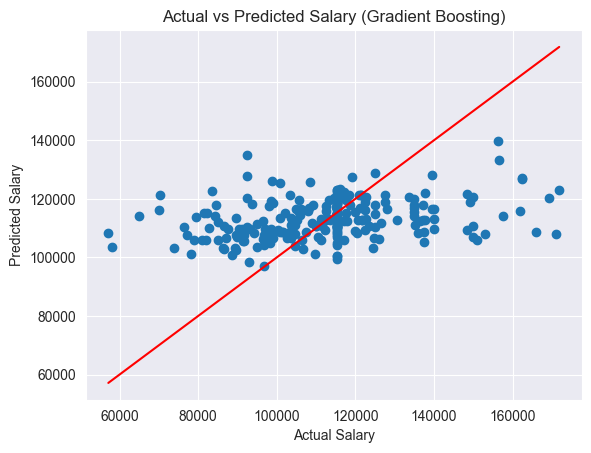

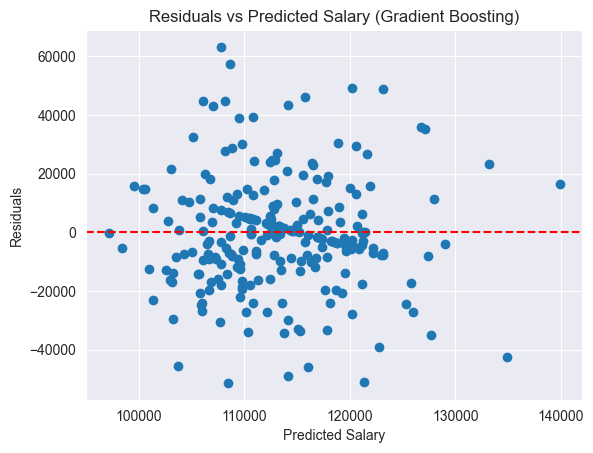

In [182]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_model is already defined and contains the necessary data
X = df_model.drop("salary_estimate", axis=1)  # Features
y = df_model["salary_estimate"].values  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Grid Search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(gb_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best estimator
best_gb_model = grid_search.best_estimator_

# Fit the model on the full training set
best_gb_model.fit(X_train, y_train)

# Make predictions
y_pred = best_gb_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                        # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)              # R-squared

# Print out the results
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Mean Squared Error: ${mse:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"R-squared: {r2:.2f}")

# Accuracy
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print(f"Accuracy: {accuracy:.2f}%")

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (Gradient Boosting)')
plt.show()

# Plot residuals (prediction errors)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Salary (Gradient Boosting)')
plt.show()


In [183]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.0 MB/s eta 0:00:00


Mean Absolute Error: $14,096.17
Mean Squared Error: $370,028,106.88
Root Mean Squared Error: $19,236.11
R-squared: 0.10
Accuracy: 86.66%


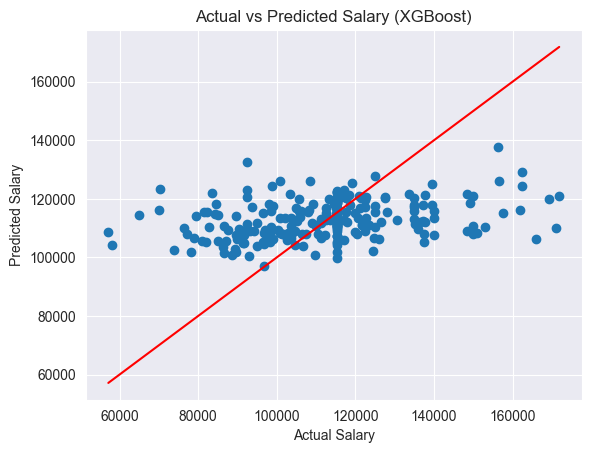

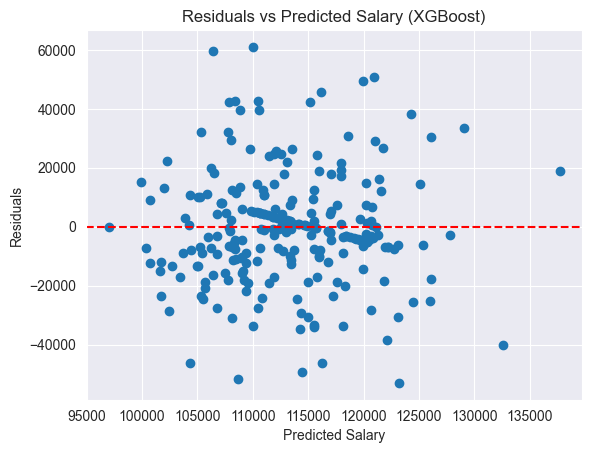

In [186]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_model is already defined and contains the necessary data
X = df_model.drop("salary_estimate", axis=1)  # Features
y = df_model["salary_estimate"].values  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Grid Search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best estimator
best_xgb_model = grid_search.best_estimator_

# Fit the model on the full training set
best_xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = best_xgb_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                        # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)              # R-squared

# Print out the results
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Mean Squared Error: ${mse:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"R-squared: {r2:.2f}")

# Accuracy
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print(f"Accuracy: {accuracy:.2f}%")

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (XGBoost)')
plt.show()

# Plot residuals (prediction errors)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Salary (XGBoost)')
plt.show()


Analysis and Comparison:
Both models have similar performance in terms of MAE, MSE, and RMSE.
The Accuracy for XGBoost (86.66%) is slightly higher than that of Gradient Boosting (86.64%).
The R-squared value for both models is low (0.10), suggesting that the models explain only a small fraction of the variance in the data. This indicates that the features may not have a strong linear relationship with the target variable (salary estimate).
The MAE values indicate that the average error in predicting salary estimates is around $14,000, which is still a reasonable level of error for such prediction tasks.

### Why Are All Models Showing Similar Accuracy (86%)?

1. **Data Characteristics:**
   - **Linear Relationships:** If the relationship between features and target is approximately linear, simpler models like **Multiple Linear Regression** might perform similarly to more complex models like **Random Forest**, **Gradient Boosting**, and **XGBoost**.
   - **Limited Feature Predictiveness:** If features don't fully capture the complexity of salary prediction, models will perform similarly.

2. **Model Overfitting or Underfitting:**
   - **Overfitting/Underfitting:** If models are not well-tuned, they may underfit or overfit, causing similar performance. Hyperparameter tuning is crucial for models like **Random Forest** and **XGBoost** to improve accuracy.
   - **Model Configuration:** Suboptimal hyperparameters (e.g., depth of trees or learning rate) can make powerful models behave like simpler ones.

3. **Feature Engineering:**
   - **Weak Features:** If features aren’t meaningful enough or don’t capture variability, all models might converge to similar performance levels.
   - **Lack of Preprocessing:** Poor data preprocessing (e.g., missing values, scaling, encoding) can hinder model performance, even for ensemble models.

4. **Accuracy Metric in Regression:**
   - **Accuracy** isn’t ideal for regression problems; metrics like **MAE** or **RMSE** are more informative. **Accuracy** here might misrepresent performance due to continuous target variables (salaries).

5. **Baseline Performance:**
   - If the **baseline** performance is high (due to predictable salary features), even simple models may achieve close to the same performance.

### Suggestions to Improve:
1. **Feature Engineering:** Add or transform features (e.g., years of experience, job seniority).
2. **Hyperparameter Tuning:** Use **GridSearchCV** or **RandomizedSearchCV** for better model tuning.
3. **Ensemble Methods:** Combine models using **Stacking** or **Voting Regressor** for improved performance.
4. **Explore Other Algorithms:** Try **SVMs** or **Neural Networks** for more complex relationships.
5. **Cross-Validation:** Use **cross-validation** to better estimate model performance and reduce variance from a single split.


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13319455744.0000 - val_loss: 12828234752.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 13264898048.0000 - val_loss: 12827741184.0000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 13552080896.0000 - val_loss: 12826250240.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 13378804736.0000 - val_loss: 12822502400.0000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 13224759296.0000 - val_loss: 12814491648.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 13124675584.0000 - val_loss: 12799123456.0000
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 13092031488.0000 - val_loss: 12772269056.0000
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 13032785920.0000 - val_loss: 12728416256.0000
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 12994269184.0000 - val_loss: 12661045248.0000
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━

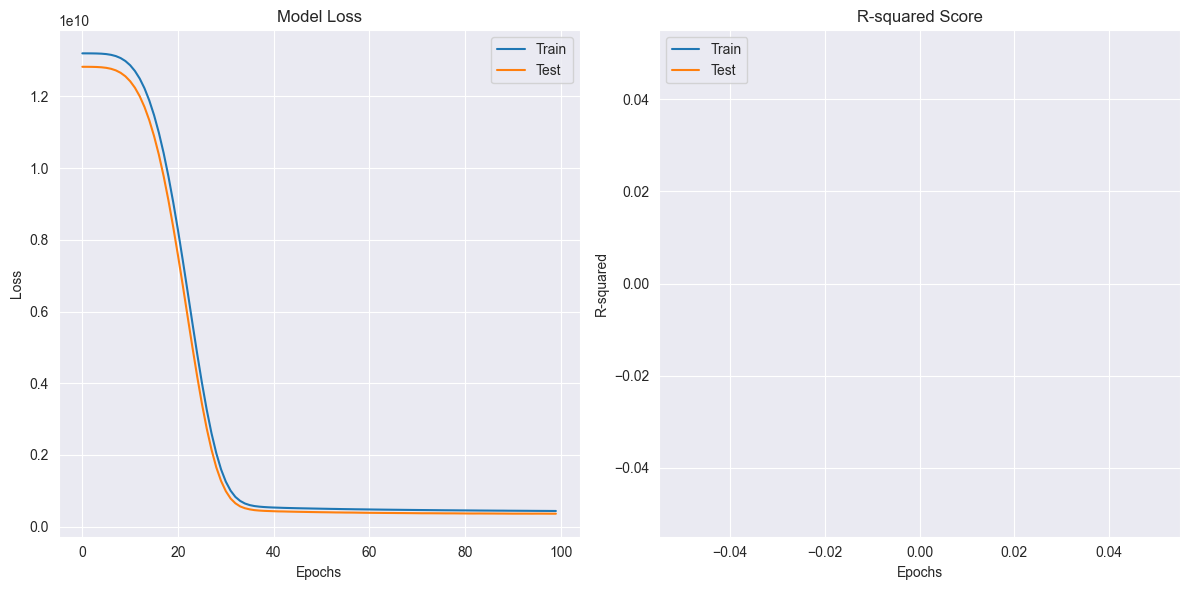

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming df_model is already one-hot encoded and looks similar to this
# df_model = pd.read_csv('path_to_your_one_hot_encoded_data.csv')

# Separate features (X) and target (y)
X = df_model.drop('salary_estimate', axis=1)  # Drop target column
y = df_model['salary_estimate']  # Target column

# Step 1: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Define the Neural Network model
model = Sequential()

# Input layer (input_dim is the number of features in X)
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Output layer (regression)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Predict and evaluate the model
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Mean Squared Error: ${mse:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Accuracy (though accuracy is not ideal for regression, you can use R-squared)
accuracy = r2 * 100  # R2 multiplied by 100 for percentage
print(f"Accuracy: {accuracy:.2f}%")

# Plotting training history (loss and validation loss)
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')

# Plot training & validation R-squared values (if available)
plt.subplot(1, 2, 2)
plt.plot(history.history.get('r2', []))  # If r2 is available in history
plt.plot(history.history.get('val_r2', []))  # If val_r2 is available in history
plt.title('R-squared Score')
plt.xlabel('Epochs')
plt.ylabel('R-squared')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13045905408.0000 - val_loss: 12827843584.0000
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13186735104.0000 - val_loss: 12826507264.0000
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12946253824.0000 - val_loss: 12822627328.0000
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 13100767232.0000 - val_loss: 12813552640.0000
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 13332819968.0000 - val_loss: 12794905600.0000
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 13007656960.0000 - val_loss: 12760240128.0000
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 13248326656.0000 - val_loss: 12701056000.0000
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 13144673280.0000 - val_loss: 12607186944.0000
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 13063875584.0000 - val_loss: 12465758208.0000
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 

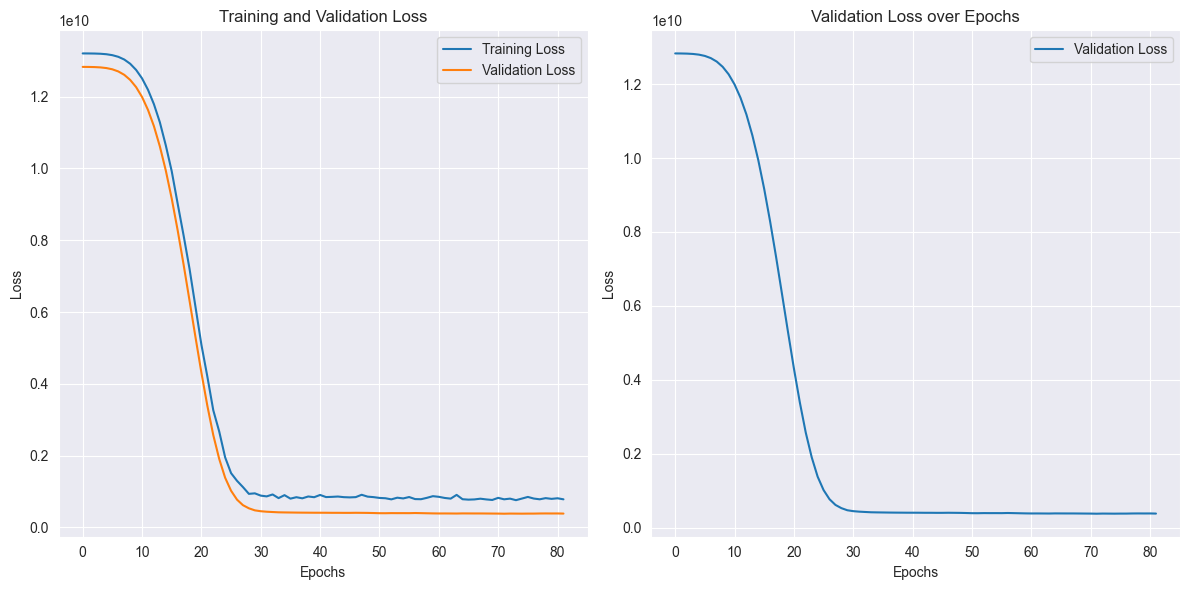

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming df_model is already one-hot encoded and looks like this:
# df_model = pd.read_csv('path_to_your_one_hot_encoded_data.csv')

# Separate features (X) and target (y)
X = df_model.drop('salary_estimate', axis=1)  # Drop target column
y = df_model['salary_estimate']  # Target column

# Step 1: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Define the Neural Network model
model = Sequential()

# Input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Hidden layers with dropout to prevent overfitting
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout layer to prevent overfitting

model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout layer to prevent overfitting

# Output layer (regression)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback to prevent overfitting and stop training when validation loss isn't improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Step 5: Predict and evaluate the model
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Mean Squared Error: ${mse:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Accuracy (R-squared as accuracy metric for regression)
accuracy = r2 * 100  # R2 multiplied by 100 for percentage
print(f"Accuracy: {accuracy:.2f}%")

# Step 6: Plot training history
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# R2 score plot
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
